In [1]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt
from sklearn.preprocessing import MinMaxScaler


In [2]:
#importing the csv file
df = pd.read_csv('HR_comma_sep.csv')

In [3]:
#checking the first 5 rows of the data
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
#Checking the amount of rows vs columns on the data
df.shape

(14999, 10)

In [6]:
#Checking the names of the columns in the data
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [ ]:
#Renaming the names of the columns
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'
                        })

In [21]:
#Checking to see if there are any null values in the data
df.isnull().sum()

satisfaction           0
evaluation             0
projectCount           0
averageMonthlyHours    0
yearsAtCompany         0
workAccident           0
turnover               0
promotion              0
Department             0
salary                 0
dtype: int64

In [27]:
#Identifying the differnt data types in the data
df.dtypes

satisfaction           float64
evaluation             float64
projectCount             int64
averageMonthlyHours      int64
yearsAtCompany           int64
workAccident             int64
turnover                 int64
promotion                int64
Department              object
salary                  object
dtype: object

In [28]:
#info is just to be able to get some more information on the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   satisfaction         14999 non-null  float64
 1   evaluation           14999 non-null  float64
 2   projectCount         14999 non-null  int64  
 3   averageMonthlyHours  14999 non-null  int64  
 4   yearsAtCompany       14999 non-null  int64  
 5   workAccident         14999 non-null  int64  
 6   turnover             14999 non-null  int64  
 7   promotion            14999 non-null  int64  
 8   Department           14999 non-null  object 
 9   salary               14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
#Getting statistical information on the data
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [29]:
#This code allows me to see some of the unique values in the dataset
for column in df:
    unique_vals = np.unique(df[column])
    nr_values = len(unique_vals)
    if nr_values < 36:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values, unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature satisfaction :92
The number of values for feature evaluation :65
The number of values for feature projectCount :6 -- [2 3 4 5 6 7]
The number of values for feature averageMonthlyHours :215
The number of values for feature yearsAtCompany :8 -- [ 2  3  4  5  6  7  8 10]
The number of values for feature workAccident :2 -- [0 1]
The number of values for feature turnover :2 -- [0 1]
The number of values for feature promotion :2 -- [0 1]
The number of values for feature Department :10 -- ['IT' 'RandD' 'accounting' 'hr' 'management' 'marketing' 'product_mng'
 'sales' 'support' 'technical']
The number of values for feature salary :3 -- ['high' 'low' 'medium']


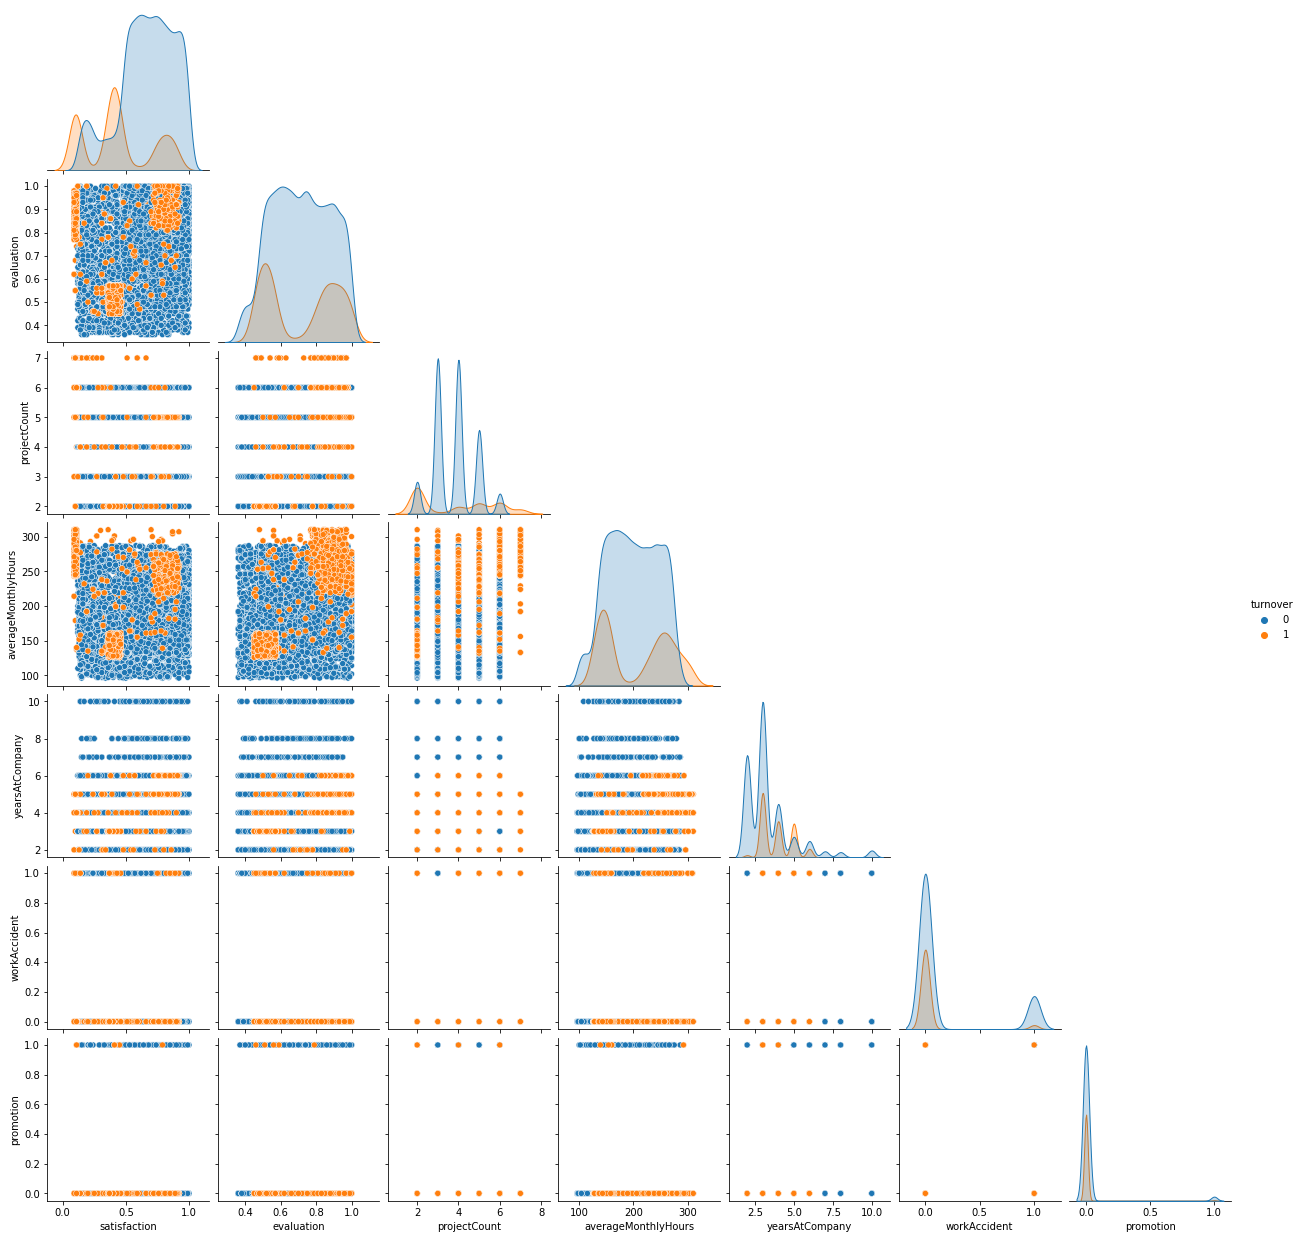

In [26]:
#creating a pairplot to see the relationship between two variables
g = sns.pairplot(df, hue='turnover', corner=True)

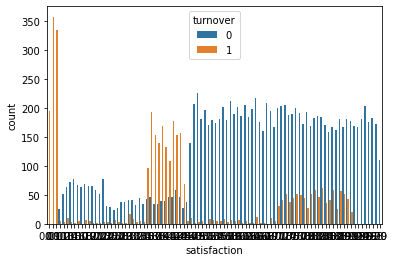

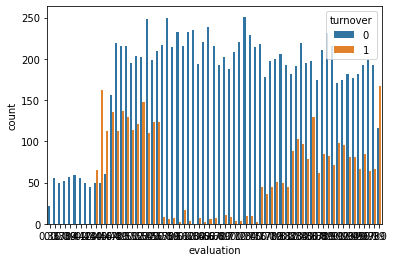

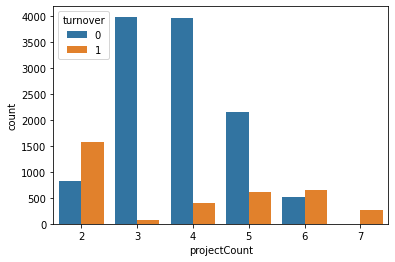

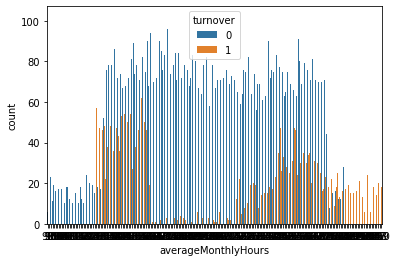

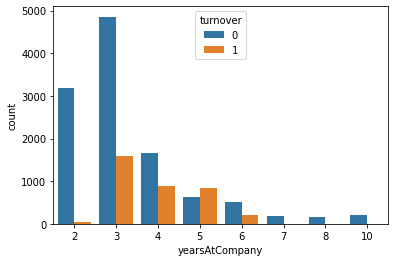

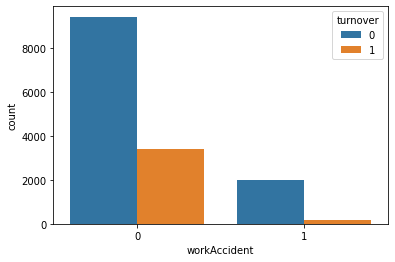

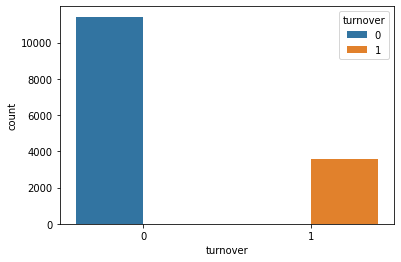

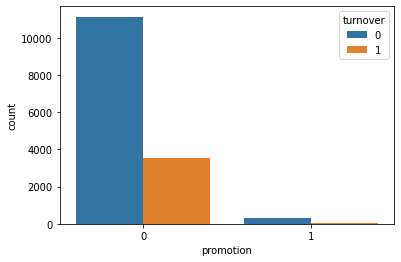

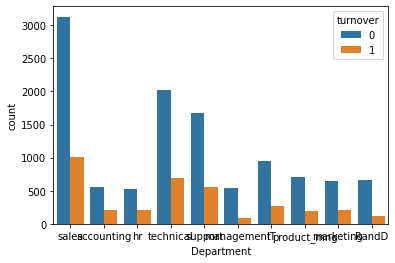

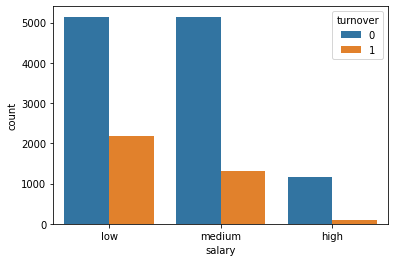

In [25]:
#creating barplots for all numerical variables but coloring turnover to see relationships

for f in df.columns:
    plt.figure()
    ax = sns.countplot(x=f, data = df,hue='turnover' )

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,turnover,promotion
satisfaction,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
projectCount,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
averageMonthlyHours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
yearsAtCompany,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
workAccident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
turnover,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


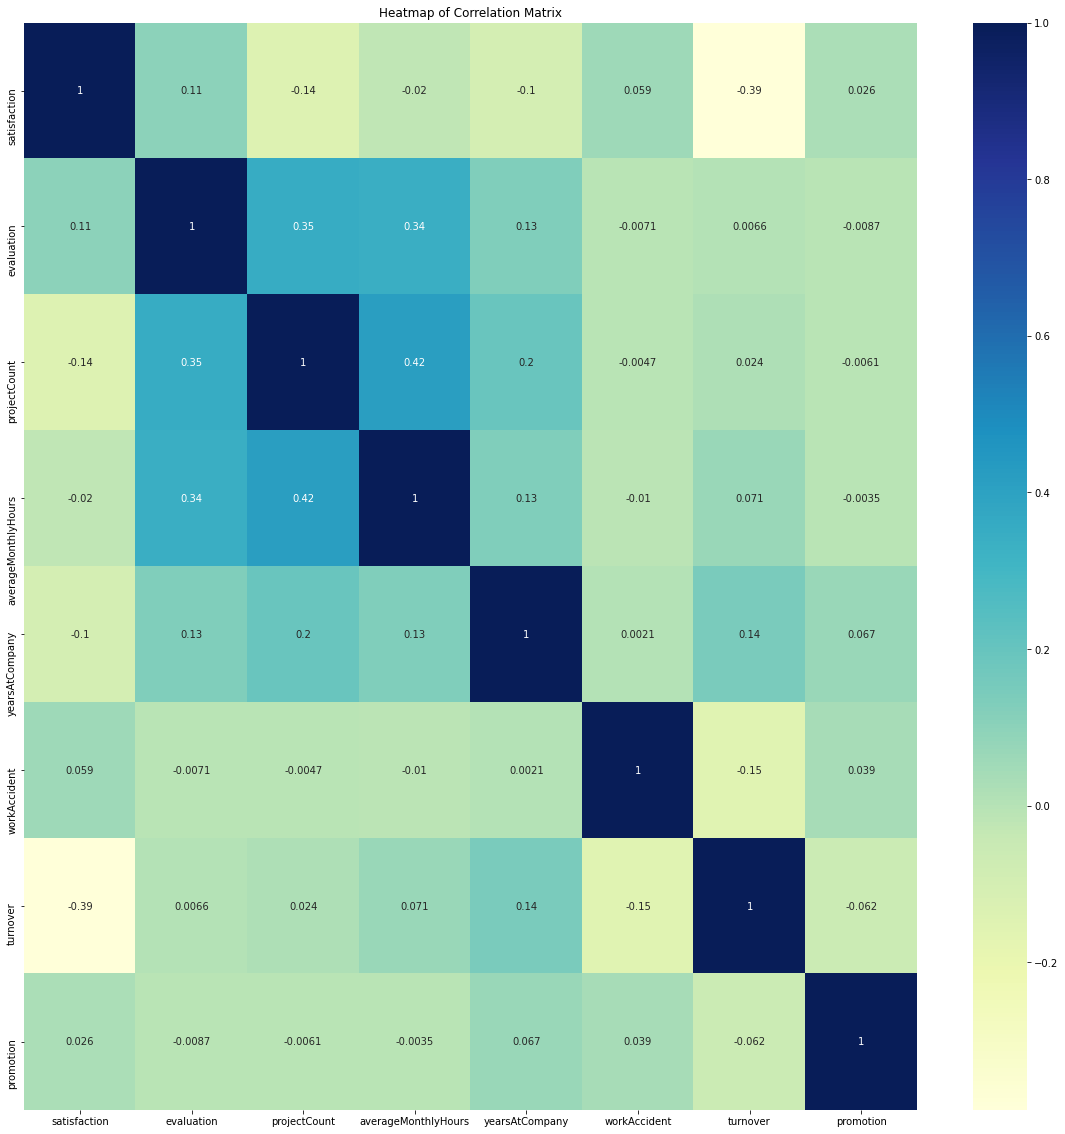

In [48]:
#creating a correlation matrix to see if there are any correlations between variables
corr = df.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,annot=True,cmap='YlGnBu')
plt.title('Heatmap of Correlation Matrix')
corr

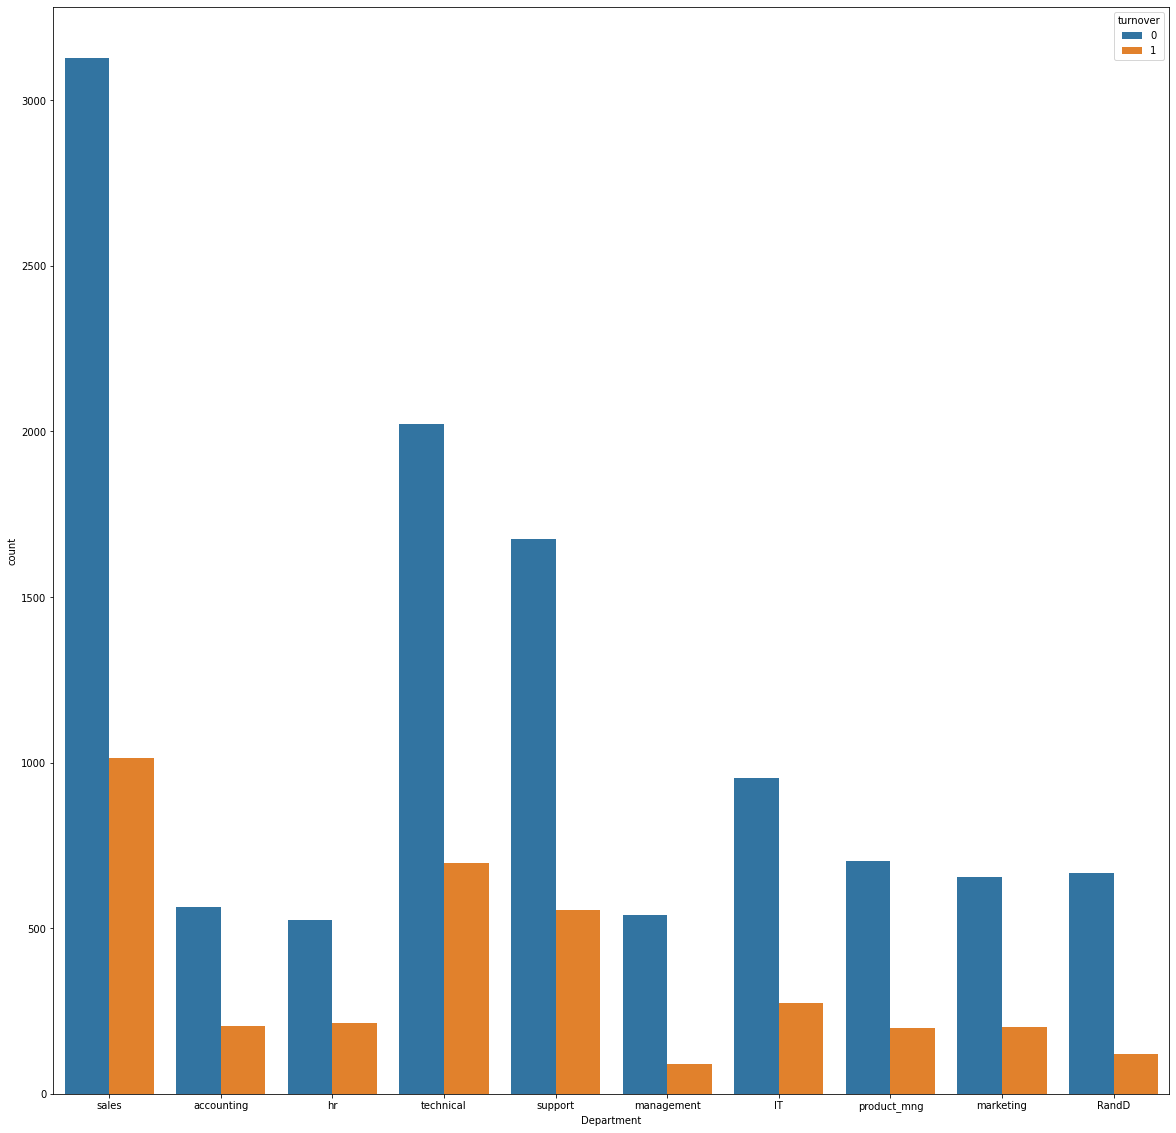

In [30]:
%matplotlib inline
plt.rcParams['figure.figsize']=20,20
ax = sns.countplot(x='Department', data = df, hue = 'turnover')

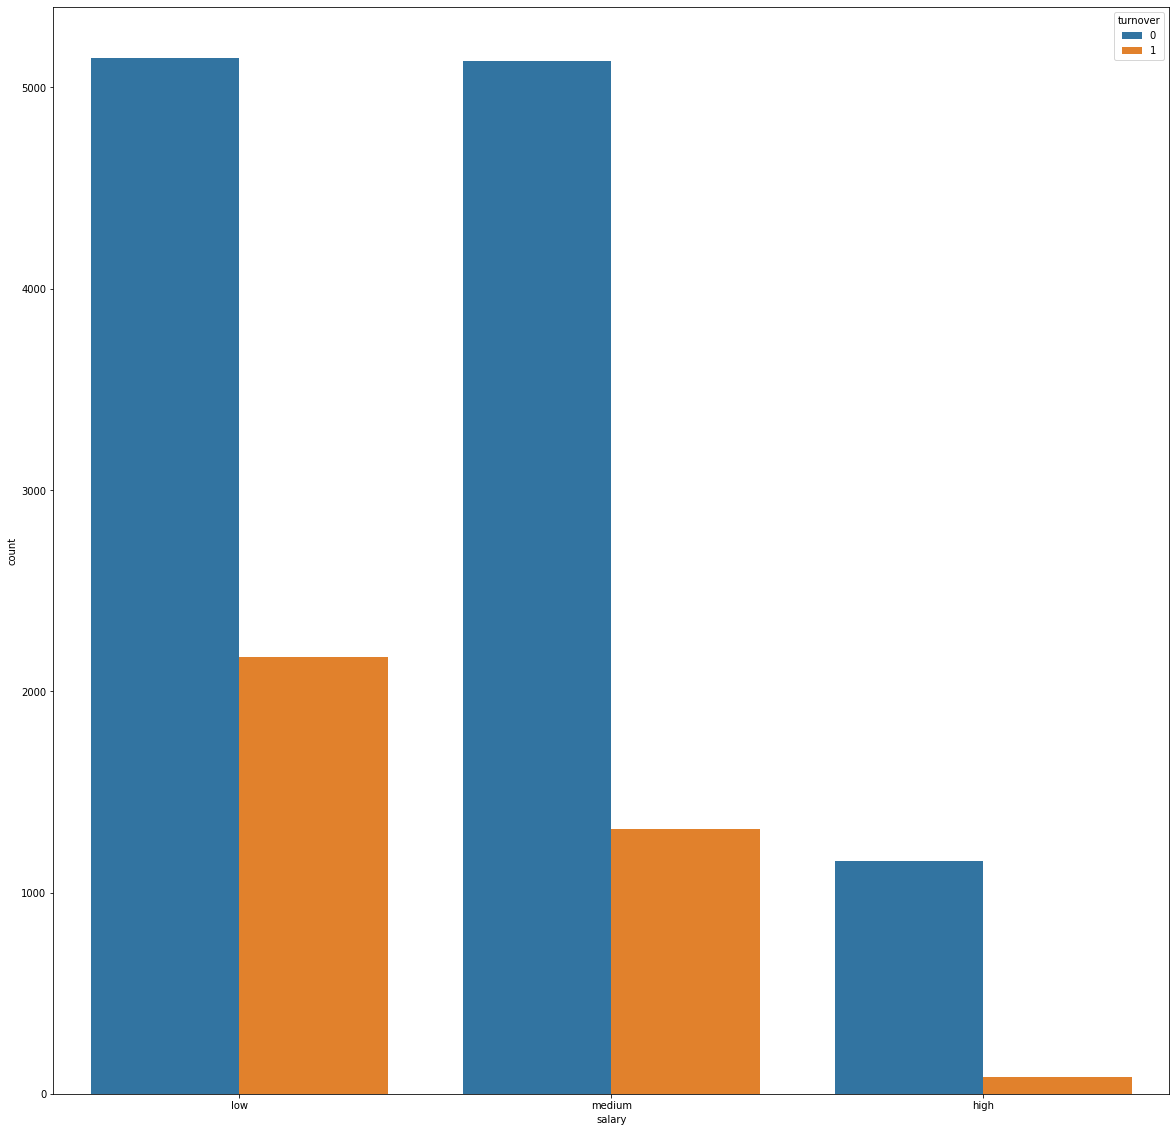

In [31]:
plt.rcParams['figure.figsize']=20,20
ax = sns.countplot(x='salary', data = df, hue = 'turnover')

In [32]:
#create a pivot table to see the counts of the departments
table = pd.pivot_table(df, values='turnover', index=['Department'],
                     aggfunc='count')
display(table)

,turnover
Department,
IT,1227
RandD,787
accounting,767
hr,739
management,630
marketing,858
product_mng,902
sales,4140
support,2229


In [34]:
#sorting those results
result = table.sort_values(('turnover'), ascending=False)
display(result)

,turnover
Department,
sales,4140
technical,2720
support,2229
IT,1227
product_mng,902
marketing,858
RandD,787
accounting,767
hr,739


In [61]:
#Creating barplots with percentages to be able to see better

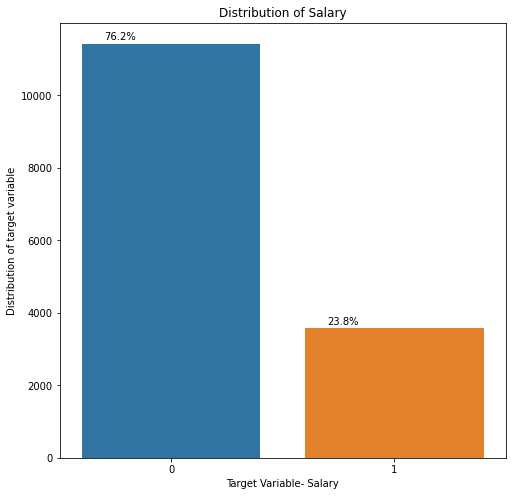

In [49]:
plt.figure(figsize=(8,8))
ax=sns.countplot(data=df,x=df['turnover'],order=df['turnover'].value_counts().index)
plt.xlabel('Target Variable- Salary')
plt.ylabel('Distribution of target variable')
plt.title('Distribution of Salary')
total = len(df)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+100))

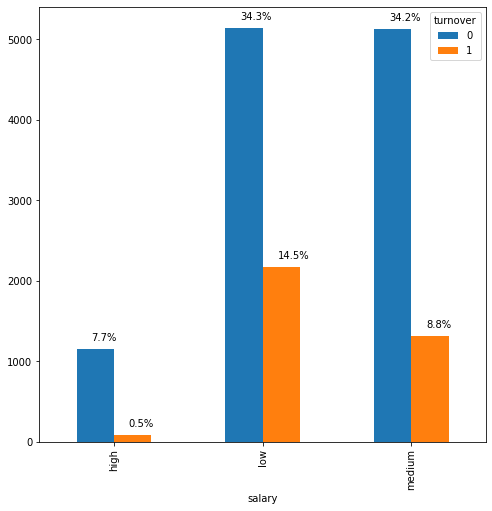

In [50]:
ax=pd.crosstab(df.salary,df.turnover).plot(kind='bar',figsize=(8,8))
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+100))

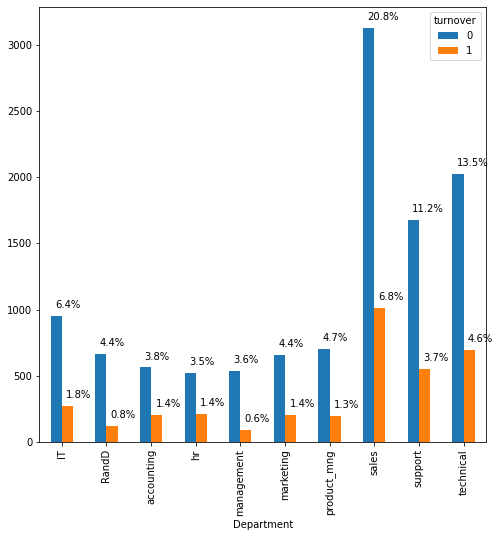

In [51]:
ax=pd.crosstab(df.Department,df.turnover).plot(kind='bar',figsize=(8,8))
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+60))

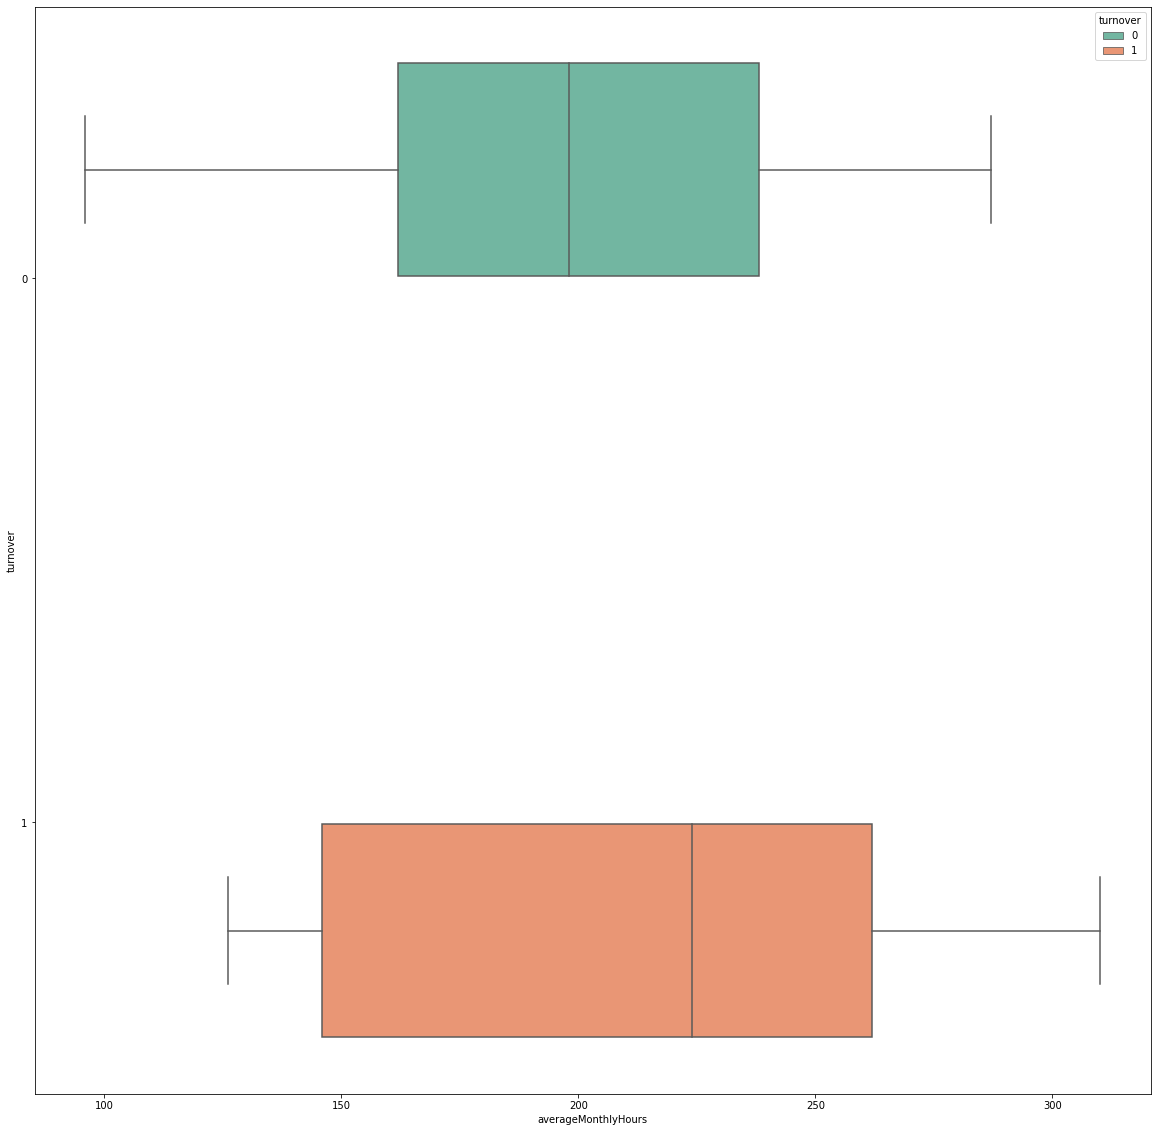

In [84]:
_=sns.boxplot(y=df.turnover,x=df.averageMonthlyHours,orient='horizontal',hue=df.turnover, palette="Set2")


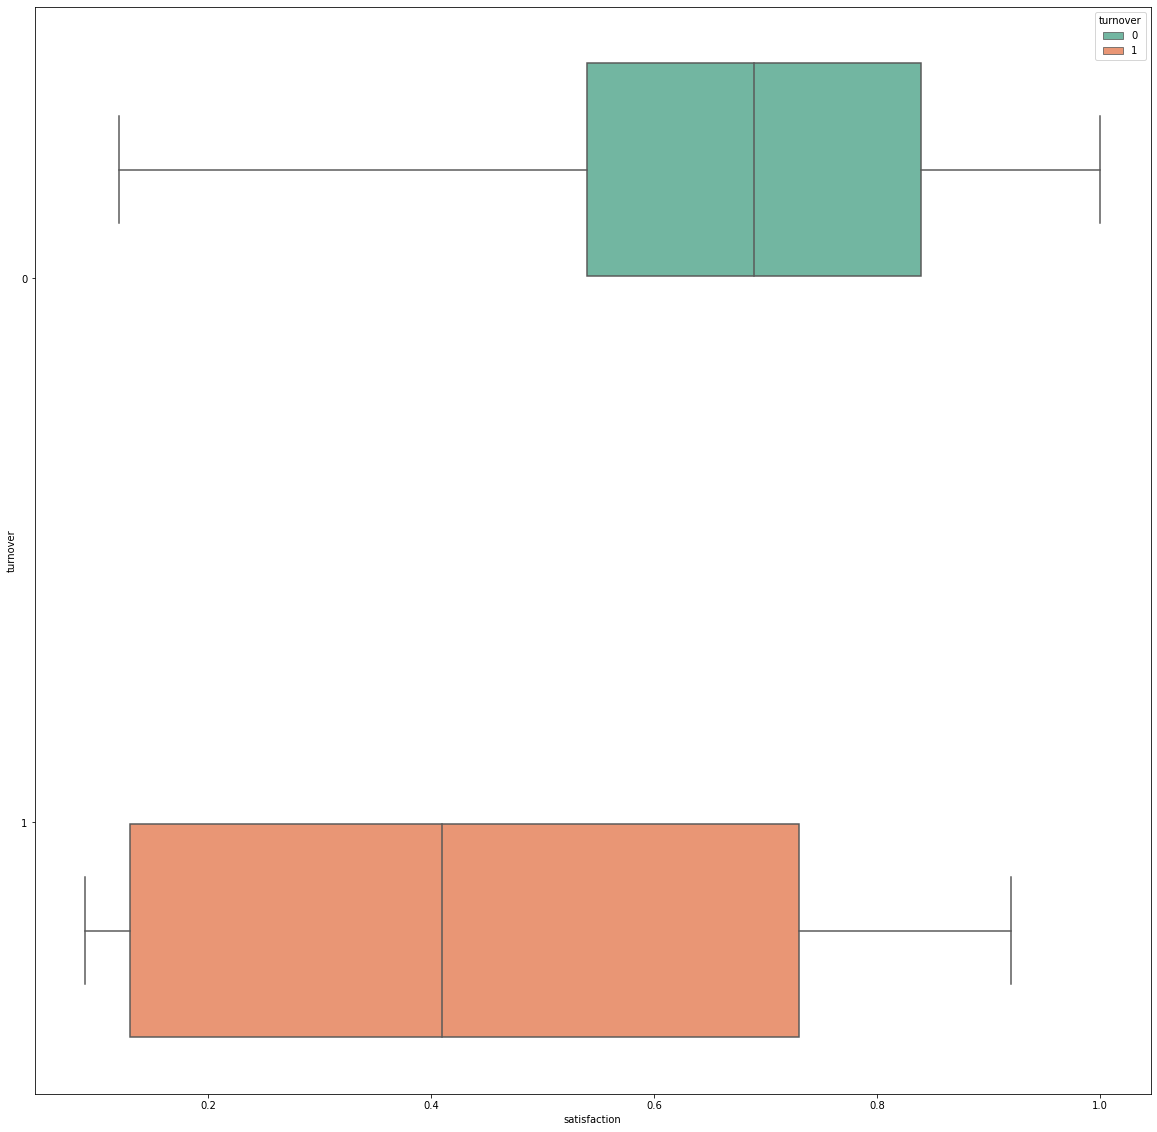

In [54]:
_=sns.boxplot(y=df.turnover,x=df.satisfaction,orient='horizontal',hue=df.turnover, palette="Set2")


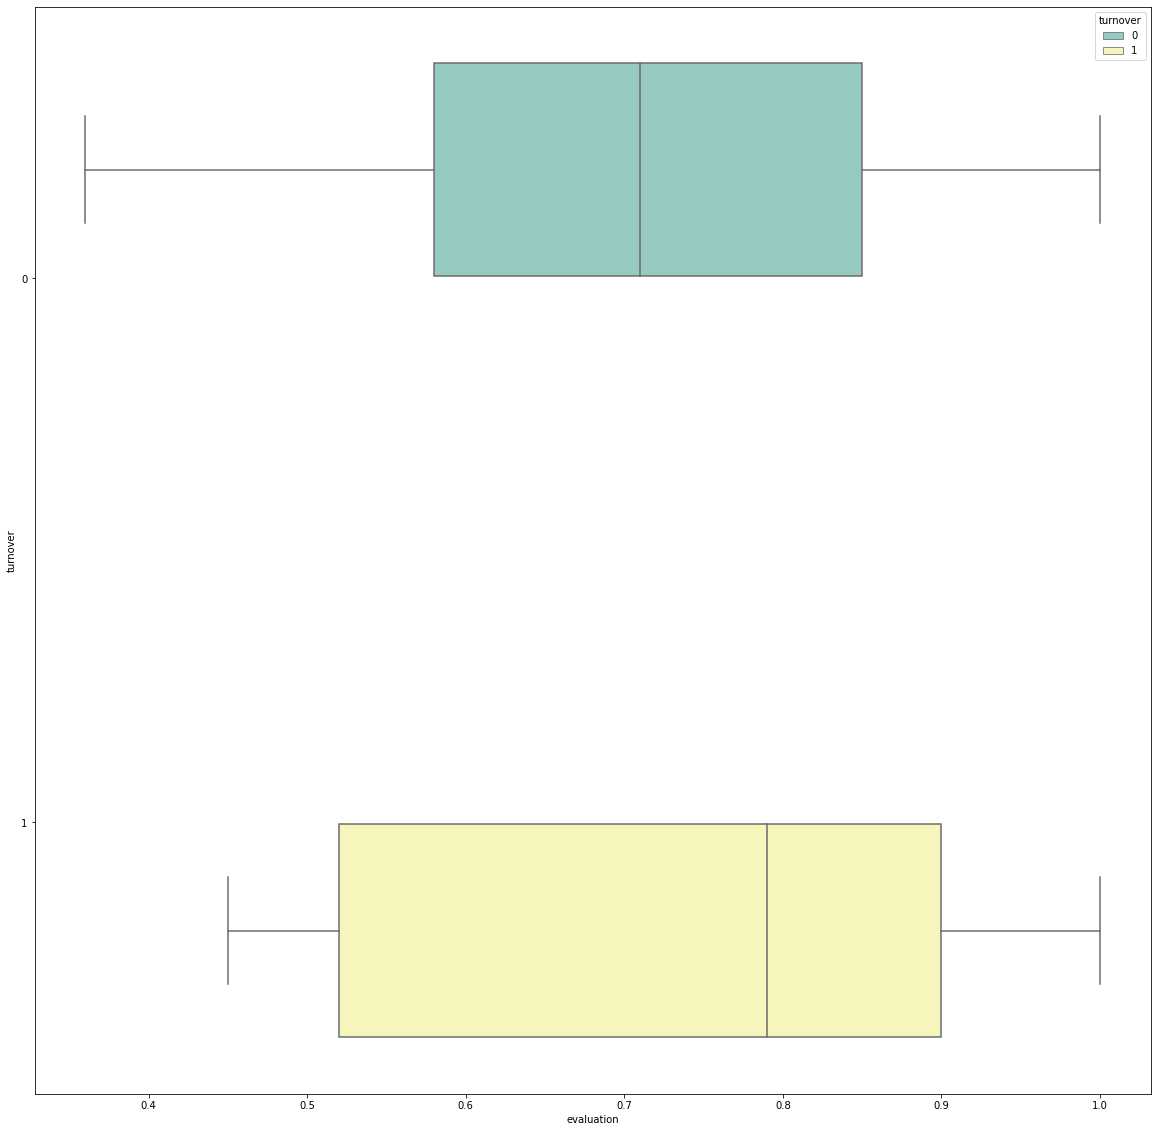

In [56]:
_=sns.boxplot(y=df.turnover,x=df.evaluation,orient='horizontal',hue=df.turnover, palette="Set3")


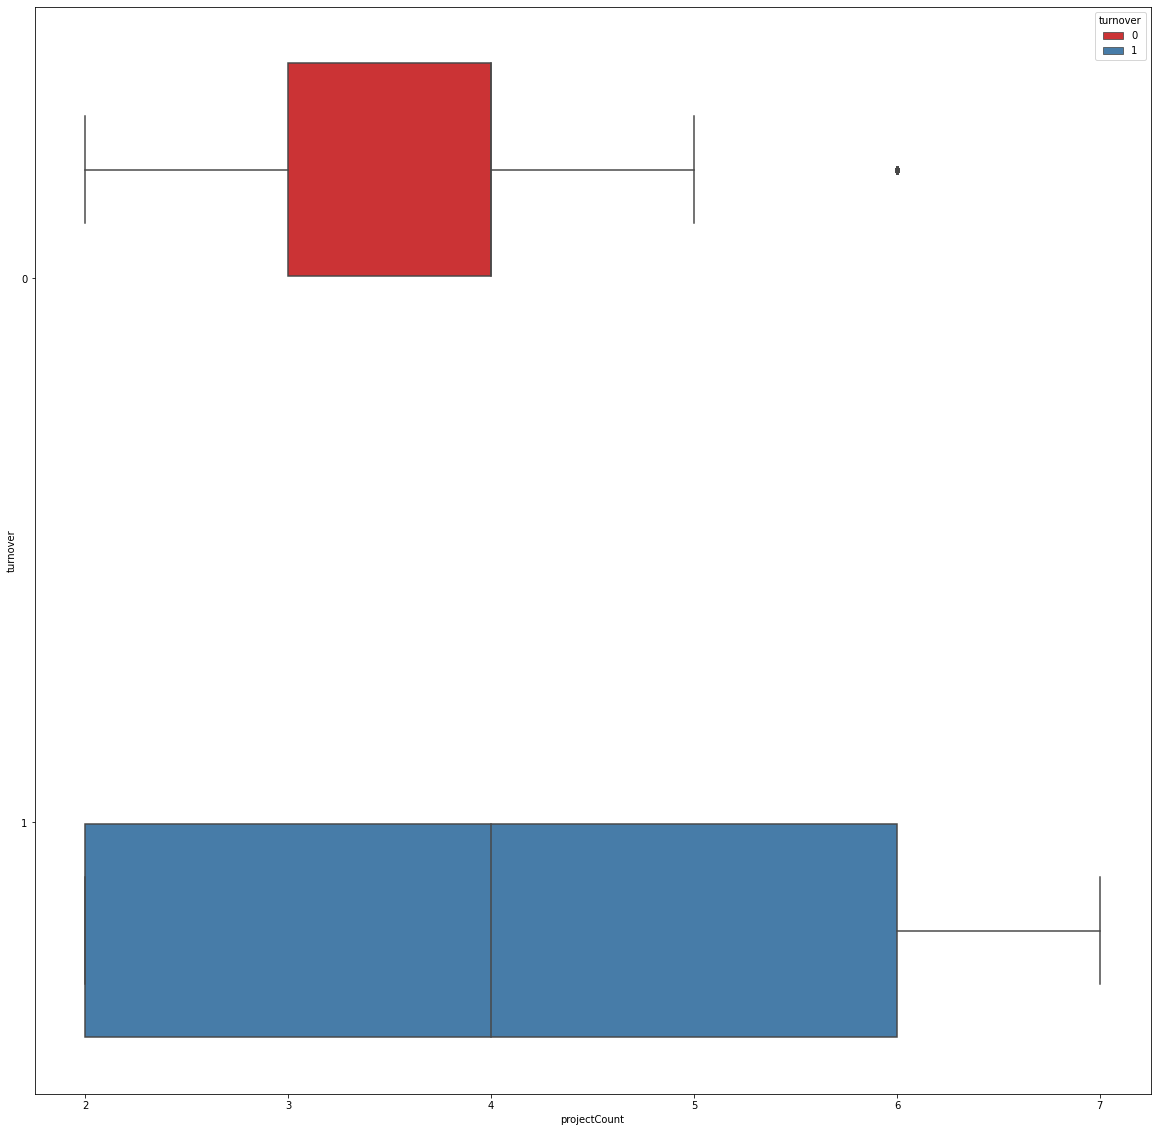

In [60]:
_=sns.boxplot(y=df.turnover,x=df.projectCount,orient='horizontal',hue=df.turnover, palette="Set1")


In [63]:
# Let's compare the means of our employee turnover satisfaction against the employee population satisfaction
emp_population_satisfaction = df['satisfaction'].mean()
emp_turnover_satisfaction = df[df['turnover']==1]['satisfaction'].mean()

print( 'The mean for the employee population is: ' + str(emp_population_satisfaction) )
print( 'The mean for the employees that had a turnover is: ' + str(emp_turnover_satisfaction) )

The mean for the employee population is: 0.6128335222348166
The mean for the employees that had a turnover is: 0.44009801176140917


In [64]:
import scipy.stats as stats
stats.ttest_1samp(a=  df[df['turnover']==1]['satisfaction'], # Sample of Employee satisfaction who had a Turnover
                  popmean = emp_population_satisfaction)  # Employee Population satisfaction mean

Ttest_1sampResult(statistic=-39.10948894348446, pvalue=9.012781195378076e-279)

/Users/miriamcorona/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Employee Count')

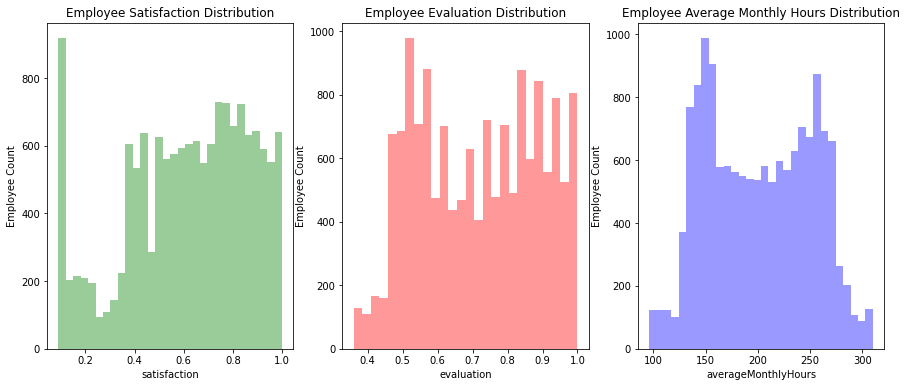

In [65]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols=3, figsize=(15, 6))

# Graph Employee Satisfaction
sns.distplot(df.satisfaction, kde=False, color="g", ax=axes[0]).set_title('Employee Satisfaction Distribution')
axes[0].set_ylabel('Employee Count')

# Graph Employee Evaluation
sns.distplot(df.evaluation, kde=False, color="r", ax=axes[1]).set_title('Employee Evaluation Distribution')
axes[1].set_ylabel('Employee Count')

# Graph Employee Average Monthly Hours
sns.distplot(df.averageMonthlyHours, kde=False, color="b", ax=axes[2]).set_title('Employee Average Monthly Hours Distribution')
axes[2].set_ylabel('Employee Count')

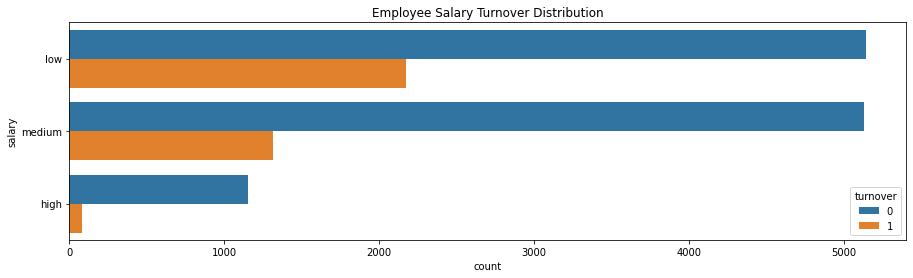

In [73]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="salary", hue='turnover', data=df).set_title('Employee Salary Turnover Distribution');

###Salary V.S. Turnover

Majority of employees who left either had low or medium salary. Barely any employees left with high salary. Employees with low to average salaries tend to leave the company.

[Text(0, 0.5, 'Percent')]

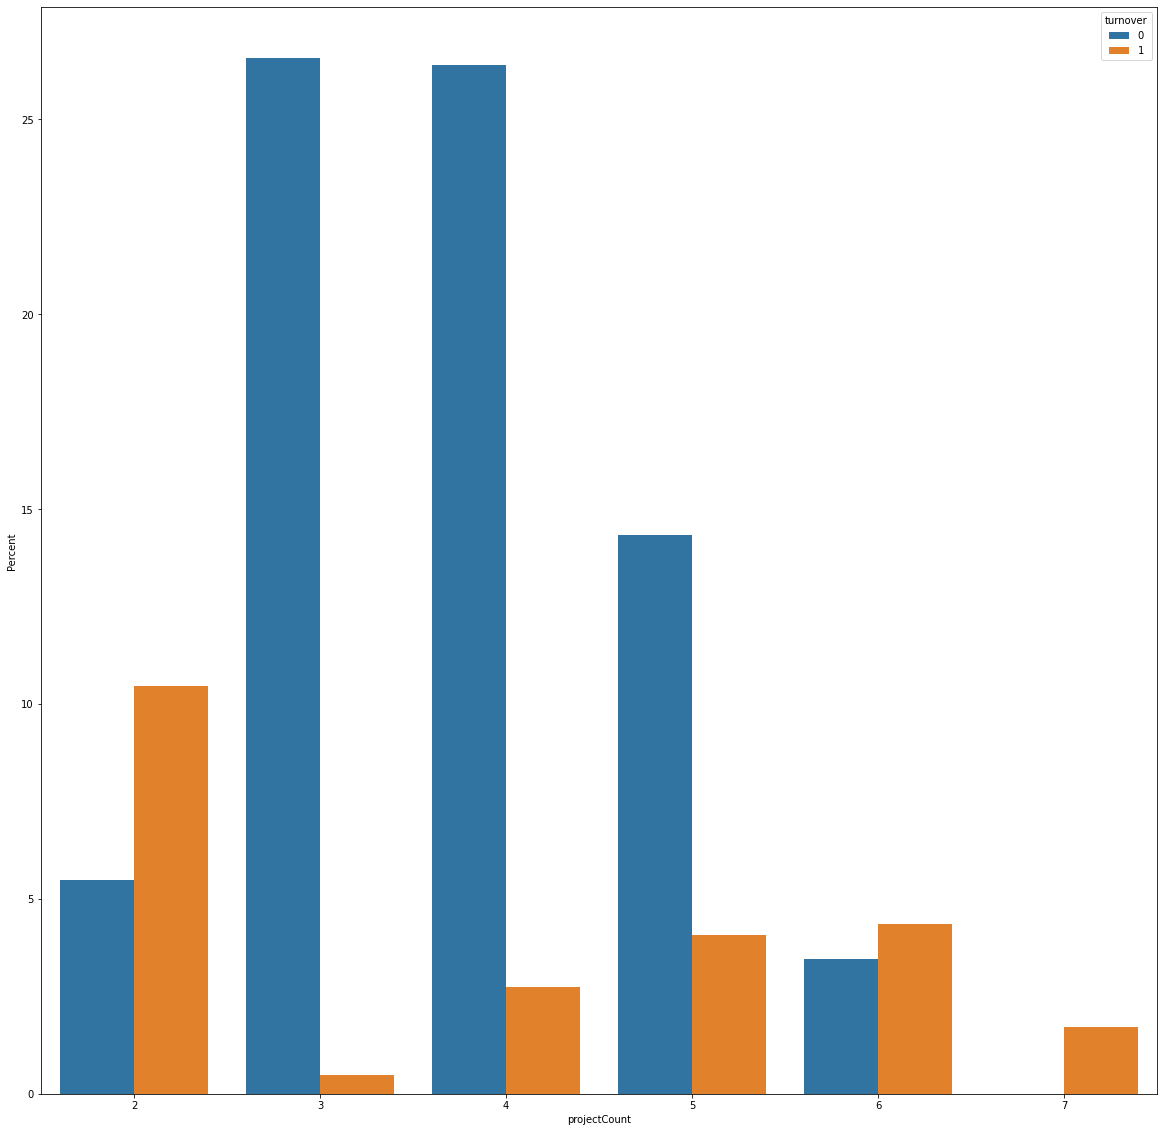

In [66]:
#Turnover barchart that shows amount of projects people did
ax = sns.barplot(x="projectCount", y="projectCount", hue="turnover", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

Turnover V.S. ProjectCount


More than half of the employees with 2,6, and 7 projects left the company. Majority of the employees who did not leave the company had 3,4, and 5 projects. All of the employees with 7 projects left the company. There is an increase in employee turnover rate as project count increases

Text(0.5, 1.0, 'Employee Evaluation Distribution - Turnover V.S. No Turnover')

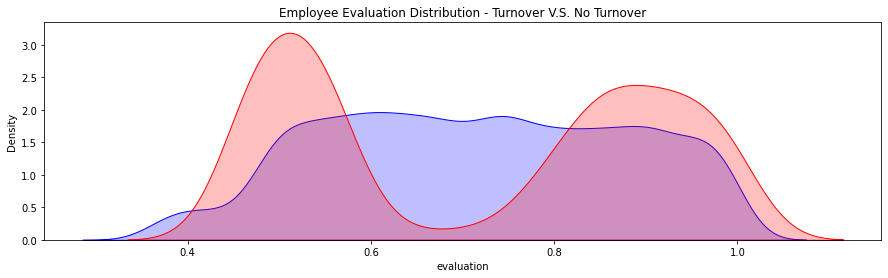

In [67]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'evaluation'] , color='b',shade=True,label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'evaluation'] , color='r',shade=True, label='turnover')
plt.title('Employee Evaluation Distribution - Turnover V.S. No Turnover')

Turnover V.S. Evaluation


There is a biomodal distribution for those that had a turnover. Employees with low performance tend to leave the company more. Employees with high performance tend to leave the company more. The sweet spot for employees that stayed is within 0.6-0.8 evaluation

Text(0.5, 1.0, 'Employee Satisfaction Distribution - Turnover V.S. No Turnover')

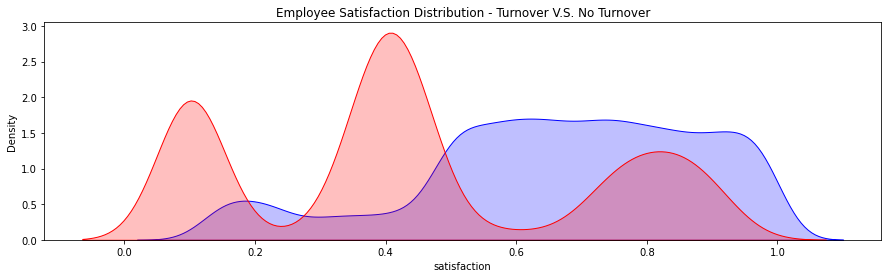

In [68]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'satisfaction'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'satisfaction'] , color='r',shade=True, label='turnover')
plt.title('Employee Satisfaction Distribution - Turnover V.S. No Turnover')


Turnover V.S. AverageMonthlyHours

There is a tri-modal distribution for employees that turnovered. Employees who had really low satisfaction levels (0.2 or less) left the company more. Employees who had low satisfaction levels (0.3~0.5) left the company more. Employees who had really high satisfaction levels (0.7 or more) left the company more

<AxesSubplot:xlabel='projectCount', ylabel='averageMonthlyHours'>

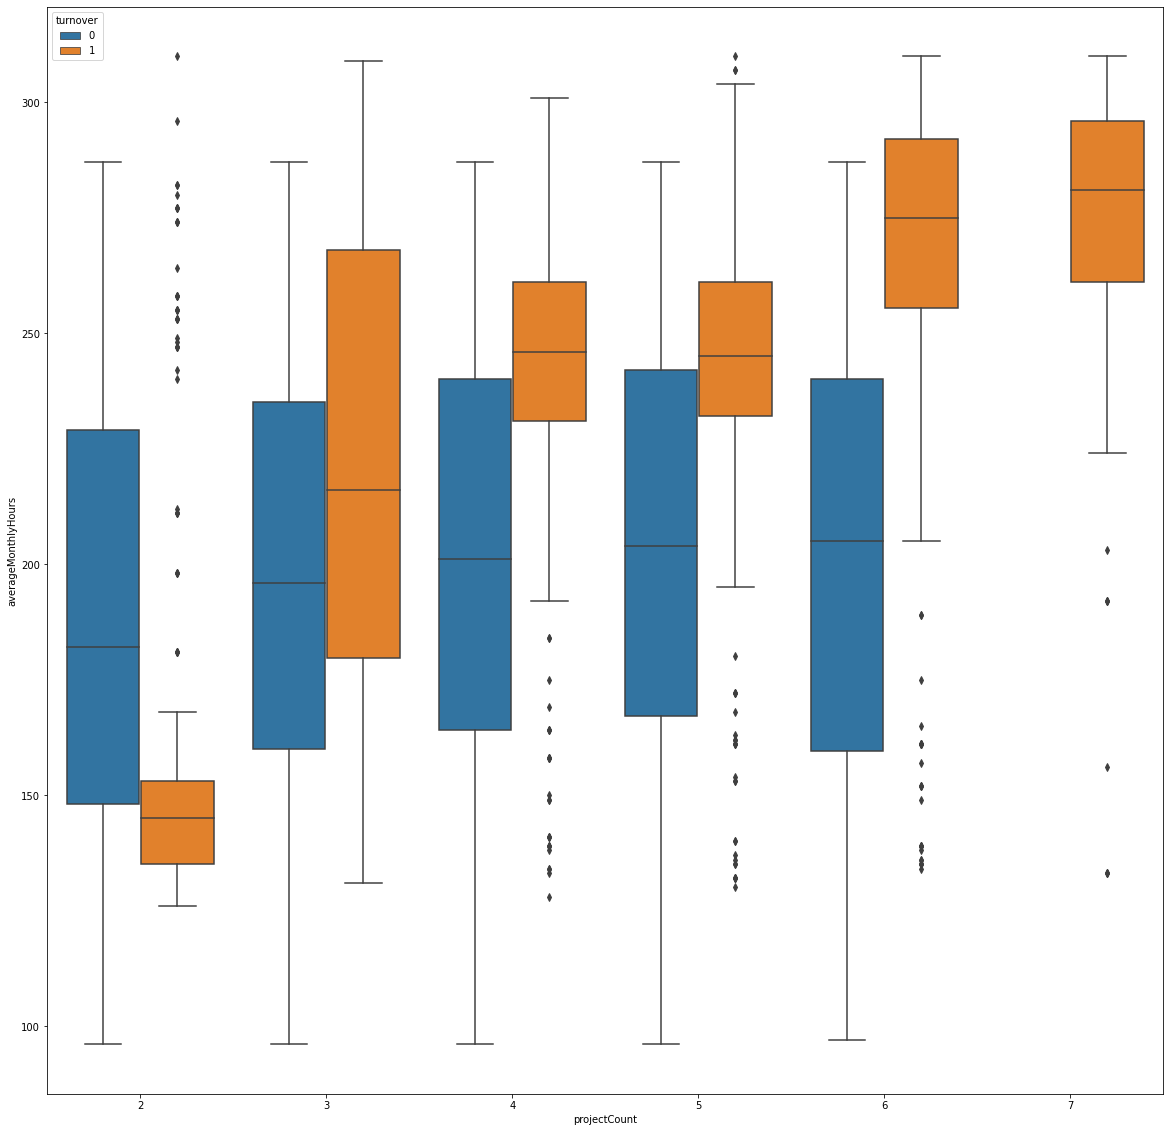

In [69]:
#ProjectCount VS AverageMonthlyHours [BOXPLOT]
#Looks like the average employees who stayed worked about 200hours/month. Those that had a turnover worked about 250hours/month and 150hours/month

import seaborn as sns
sns.boxplot(x="projectCount", y="averageMonthlyHours", hue="turnover", data=df)

ProjectCount VS AverageMonthlyHours



As project count increased, so did average monthly hours. Something weird about the boxplot graph is the difference in averageMonthlyHours between people who had a turnver and did not. Looks like employees who did not have a turnover had consistent averageMonthlyHours, despite the increase in projects. In contrast, employees who did have a turnover had an increase in averageMonthlyHours with the increase in projects.



<AxesSubplot:xlabel='projectCount', ylabel='evaluation'>

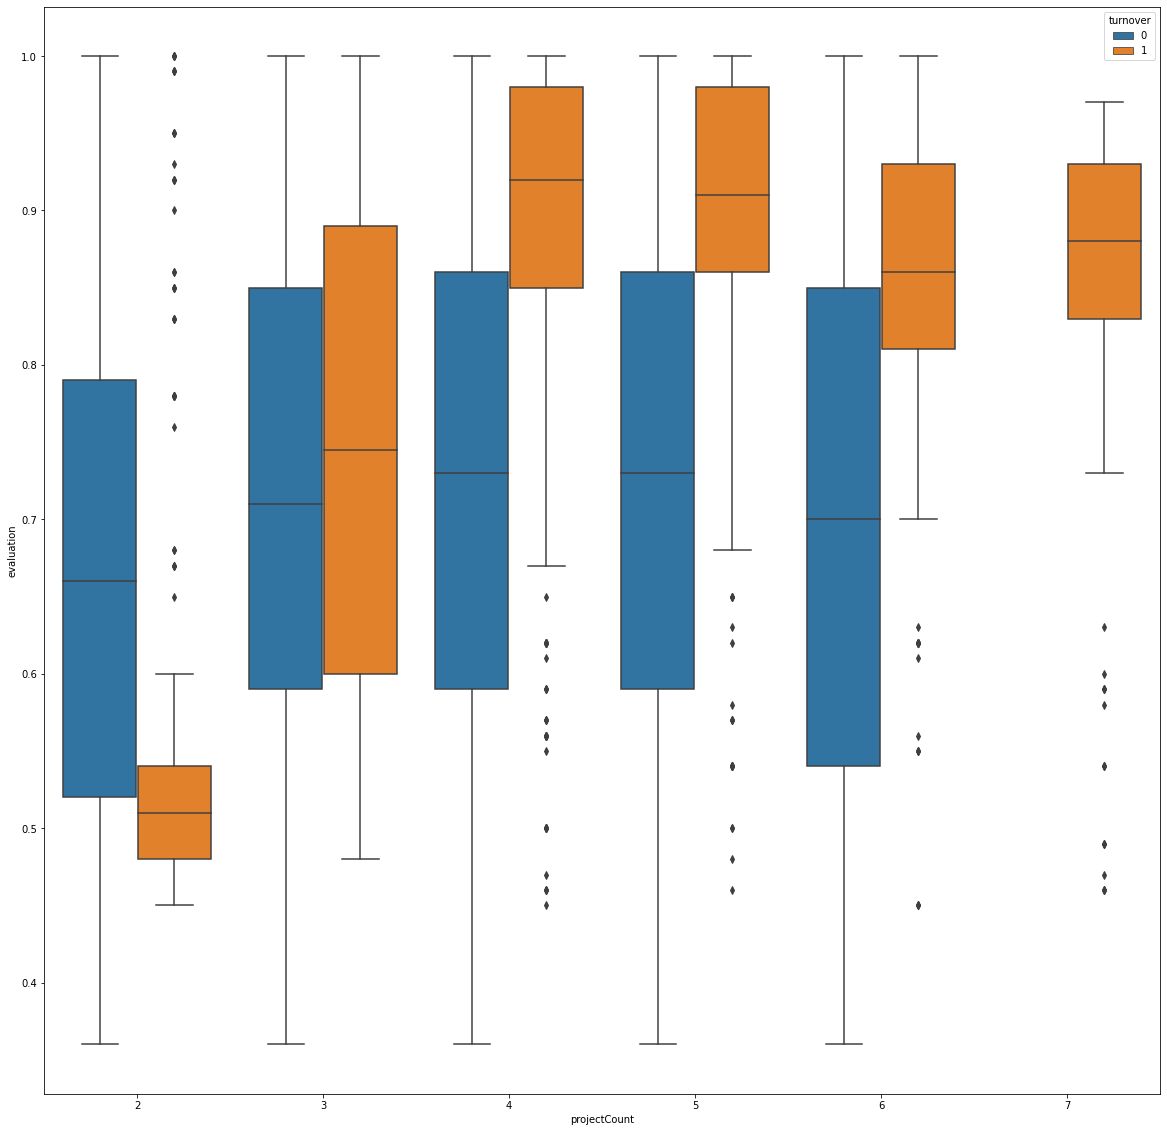

In [70]:
import seaborn as sns
sns.boxplot(x="projectCount", y="evaluation", hue="turnover", data=df)

ProjectCount VS Evaluation

This graph looks very similar to the graph above. What I find strange with this graph is with the turnover group. There is an increase in evaluation for employees who did more projects within the turnover group. But, again for the non-turnover group, employees here had a consistent evaluation score despite the increase in project counts.

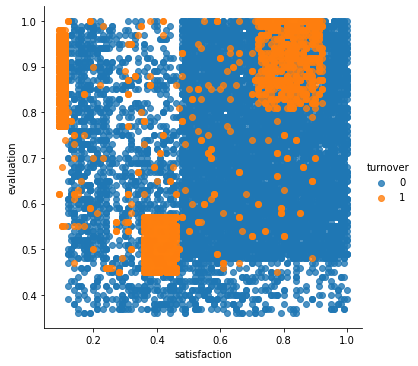

In [71]:
sns.lmplot(x='satisfaction', y='evaluation', data=df, fit_reg=False, hue='turnover')


#Satisfaction VS Evaluation



There are 3 distinct clusters for employees who left the company

Cluster 1 (Hard-working and Sad Employee): Satisfaction was below 0.2 and evaluations were greater than 0.75. Which could be a good indication that employees who left the company were good workers but felt horrible at their job.

Cluster 2 (Bad and Sad Employee): Satisfaction between about 0.35 ~ 0.45 and evaluations below ~0.58. This could be seen as employees who were badly evaluated and felt bad at work.

Cluster 3 (Hard-working and Happy Employee): Satisfaction between 0.7 ~ 1.0 and evaluations were greater than 0.8. Which could mean that employees in this cluster were "ideal". They loved their work and were evaluated highly for their performance.

[Text(0, 0.5, 'Percent')]

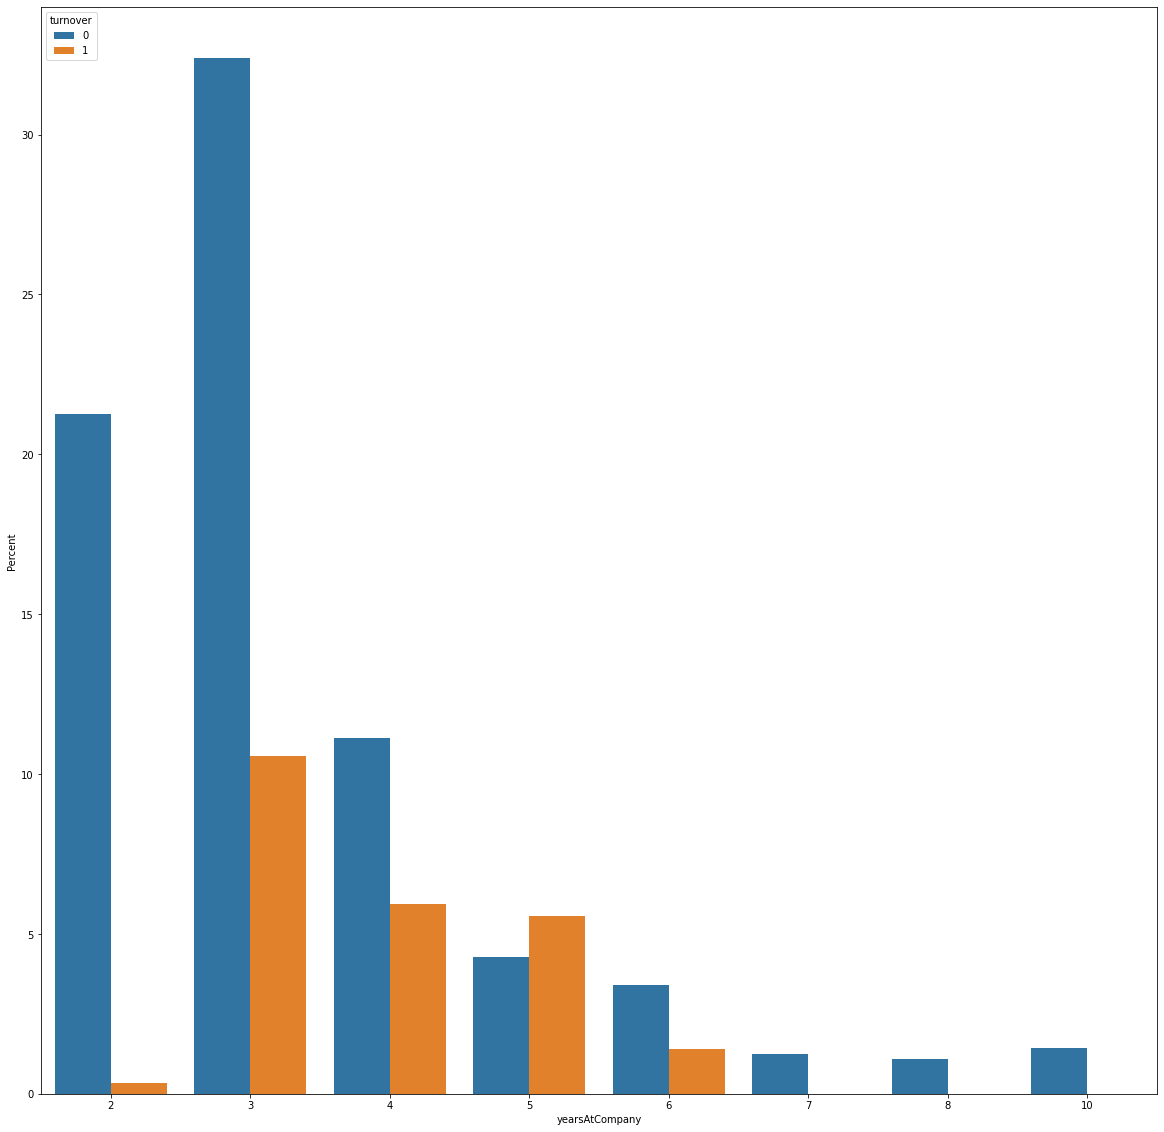

In [72]:
ax = sns.barplot(x="yearsAtCompany", y="yearsAtCompany", hue="turnover", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

#Turnover V.S. YearsAtCompany


More than half of the employees with 4 and 5 years left the company. Employees with 5 years should highly be looked into



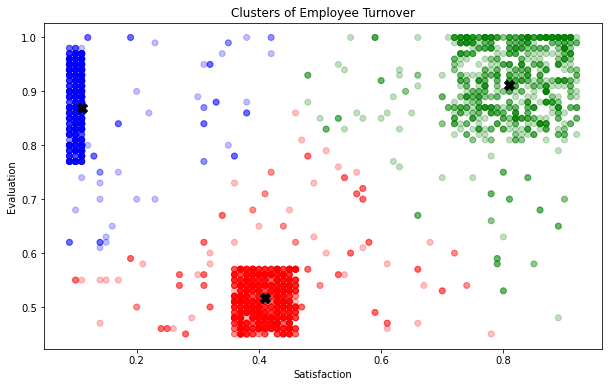

In [74]:
# Import KMeans Model
from sklearn.cluster import KMeans

# Graph and create 3 clusters of Employee Turnover
kmeans = KMeans(n_clusters=3,random_state=2)
kmeans.fit(df[df.turnover==1][["satisfaction","evaluation"]])

kmeans_colors = ['red' if c == 0 else 'blue' if c == 2 else 'green' for c in kmeans.labels_]

fig = plt.figure(figsize=(10, 6))
plt.scatter(x="satisfaction",y="evaluation", data=df[df.turnover==1],
            alpha=0.25,color = kmeans_colors)
plt.xlabel("Satisfaction")
plt.ylabel("Evaluation")
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color="black",marker="X",s=100)
plt.title("Clusters of Employee Turnover")
plt.show()

In [ ]:
df_lr=df.copy()
df_lr=pd.get_dummies(df_lr, columns = ['Department','salary'])
df_lr.head()

In [ ]:
# Let's compare the means of our employee turnover satisfaction against the employee population satisfaction
emp_population_satisfaction = df['satisfaction'].mean()
emp_turnover_satisfaction = df[df['turnover']==1]['satisfaction'].mean()

print( 'The mean for the employee population is: ' + str(emp_population_satisfaction) )
print( 'The mean for the employees that had a turnover is: ' + str(emp_turnover_satisfaction) )

stats.ttest_1samp(a=  df[df['turnover']==1]['satisfaction'], # Sample of Employee satisfaction who had a Turnover
                  popmean = emp_population_satisfaction)  # Employee Population satisfaction mean

In [88]:
emp_population_satisfaction = df['satisfaction'].mean()
emp_turnover_satisfaction = df[df['turnover']==1]['satisfaction'].mean()
stats.ttest_1samp(a=  df[df['turnover']==1]['satisfaction'], # Sample of Employee satisfaction who had a Turnover
                  popmean = emp_population_satisfaction)  # Employee Population satisfaction mean

Ttest_1sampResult(statistic=-39.10948894348446, pvalue=9.012781195378076e-279)

In [89]:
emp_population_projectCount = df['projectCount'].mean()
emp_turnover_projectCount = df[df['turnover']==1]['projectCount'].mean()
stats.ttest_1samp(a=  df[df['turnover']==1]['projectCount'], # Sample of Employee satisfaction who had a Turnover
                  popmean = emp_population_projectCount)  # Employee Population satisfaction mean

Ttest_1sampResult(statistic=1.7238512080602715, pvalue=0.08482128282514263)

In [90]:
emp_population_yearsAtCompany = df['yearsAtCompany'].mean()
emp_turnover_yearsAtCompany = df[df['turnover']==1]['yearsAtCompany'].mean()
stats.ttest_1samp(a=  df[df['turnover']==1]['yearsAtCompany'], # Sample of Employee satisfaction who had a Turnover
                  popmean = emp_population_yearsAtCompany)  # Employee Population satisfaction mean

Ttest_1sampResult(statistic=23.120349280818616, pvalue=2.518024251375598e-110)

In [101]:
emp_population_Department_IT = df_lr['Department_IT'].mean()
emp_turnover_Department_IT = df_lr[df_lr['turnover']==1]['Department_IT'].mean()
stats.ttest_1samp(a=  df_lr[df_lr['turnover']==1]['Department_IT'], # Sample of Employee satisfaction who had a Turnover
                  popmean = emp_population_Department_IT)  # Employee Population satisfaction mean

Ttest_1sampResult(statistic=-1.2044272262821873, pvalue=0.22850433702314218)

In [102]:
emp_population_Department_RandD = df_lr['Department_RandD'].mean()
emp_turnover_Department_RandD = df_lr[df_lr['turnover']==1]['Department_RandD'].mean()
stats.ttest_1samp(a=  df_lr[df_lr['turnover']==1]['Department_RandD'], # Sample of Employee satisfaction who had a Turnover
                  popmean = emp_population_Department_RandD)  # Employee Population satisfaction mean

Ttest_1sampResult(statistic=-6.13776084133514, pvalue=9.285435793517879e-10)

In [103]:
emp_population_Department_accounting = df_lr['Department_accounting'].mean()
emp_turnover_Department_accounting = df_lr[df_lr['turnover']==1]['Department_accounting'].mean()
stats.ttest_1samp(a=  df_lr[df_lr['turnover']==1]['Department_accounting'], # Sample of Employee satisfaction who had a Turnover
                  popmean = emp_population_Department_accounting)  # Employee Population satisfaction mean

Ttest_1sampResult(statistic=1.5421347199473492, pvalue=0.12312948934010125)

In [104]:
emp_population_Department_hr = df_lr['Department_hr'].mean()
emp_turnover_Department_hr = df_lr[df_lr['turnover']==1]['Department_hr'].mean()
stats.ttest_1samp(a=  df_lr[df_lr['turnover']==1]['Department_hr'], # Sample of Employee satisfaction who had a Turnover
                  popmean = emp_population_Department_hr)  # Employee Population satisfaction mean

Ttest_1sampResult(statistic=2.7472793766884473, pvalue=0.006039359239314003)

## realized that the doing an individual t-test was too time consuming so created a for loop to do it

In [118]:
#realized that the doing an individual t-test was too time consuming so created a for loop to do it
ttest_results = []
for x in df_lr.columns:
    emp_population = df_lr[x].mean()
    emp_turnover = df_lr[df_lr['turnover']==1][x].mean()
    results = stats.ttest_1samp(a=  df_lr[df_lr['turnover']==1][x], # Sample of Employee satisfaction who had a Turnover
                  popmean = emp_population)  # Employee Population satisfaction mean
    print(x,results)
    ttest_results.append((x,results))

satisfaction Ttest_1sampResult(statistic=-39.10948894348446, pvalue=9.012781195378076e-279)
evaluation Ttest_1sampResult(statistic=0.6078870291631877, pvalue=0.5433010700614106)
projectCount Ttest_1sampResult(statistic=1.7238512080602715, pvalue=0.08482128282514263)
averageMonthlyHours Ttest_1sampResult(statistic=6.218506380185923, pvalue=5.598760530139529e-10)
yearsAtCompany Ttest_1sampResult(statistic=23.120349280818616, pvalue=2.518024251375598e-110)
workAccident Ttest_1sampResult(statistic=-27.375035987124736, pvalue=6.146641075602401e-150)
turnover Ttest_1sampResult(statistic=inf, pvalue=0.0)
promotion Ttest_1sampResult(statistic=-13.097904548560857, pvalue=2.5532378106507945e-38)
Department_IT Ttest_1sampResult(statistic=-1.2044272262821873, pvalue=0.22850433702314218)
Department_RandD Ttest_1sampResult(statistic=-6.13776084133514, pvalue=9.285435793517879e-10)
Department_accounting Ttest_1sampResult(statistic=1.5421347199473492, pvalue=0.12312948934010125)
Department_hr Ttest_1s

In [100]:
df_lr.columns

Index(['satisfaction', 'evaluation', 'projectCount', 'averageMonthlyHours',
       'yearsAtCompany', 'workAccident', 'turnover', 'promotion',
       'Department_IT', 'Department_RandD', 'Department_accounting',
       'Department_hr', 'Department_management', 'Department_marketing',
       'Department_product_mng', 'Department_sales', 'Department_support',
       'Department_technical', 'salary_high', 'salary_low', 'salary_medium'],
      dtype='object')

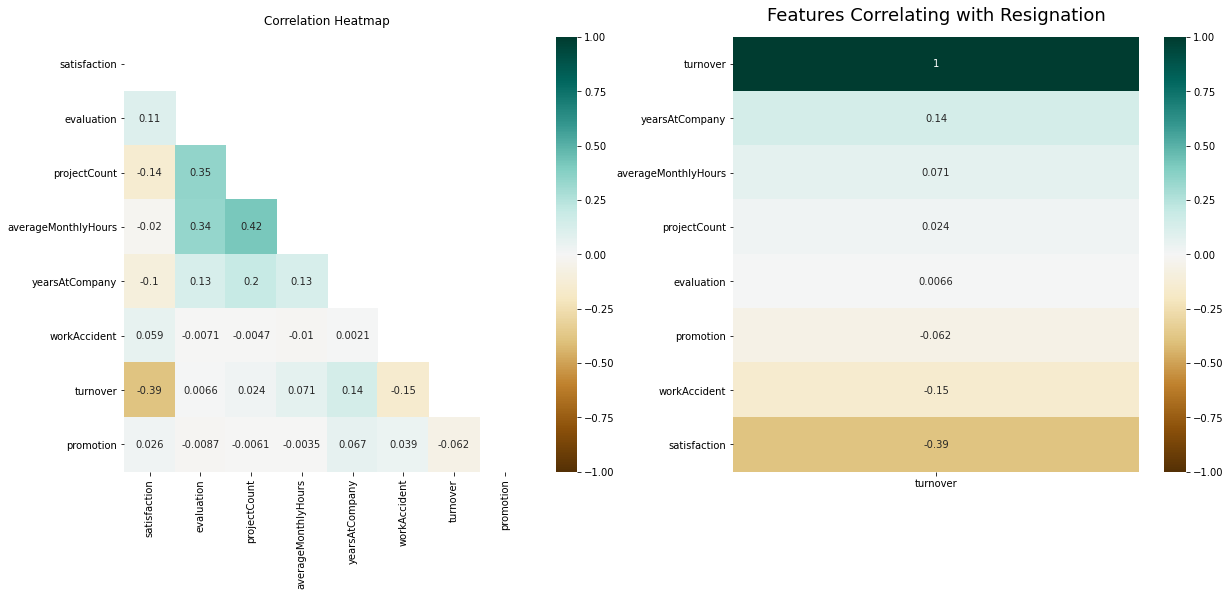

In [82]:
#Doing another correlation matrix but also doing a barchart of the correlation matrix 
#from least to greatest
fig,ax=plt.subplots(ncols=2,figsize=(20,8))
resign_corr=df.corr()
mask = np.triu(np.ones_like(resign_corr, dtype=np.bool))
cat_heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG',ax=ax[0])
cat_heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

heatmap = sns.heatmap(resign_corr[['turnover']].sort_values(by='turnover', ascending=False),vmin=-1, vmax=1, annot=True, cmap='BrBG',ax=ax[1])
heatmap.set_title('Features Correlating with Resignation', fontdict={'fontsize':18}, pad=16);


In [83]:
df.columns

Index(['satisfaction', 'evaluation', 'projectCount', 'averageMonthlyHours',
       'yearsAtCompany', 'workAccident', 'turnover', 'promotion', 'Department',
       'salary'],
      dtype='object')

<Figure size 648x648 with 0 Axes>

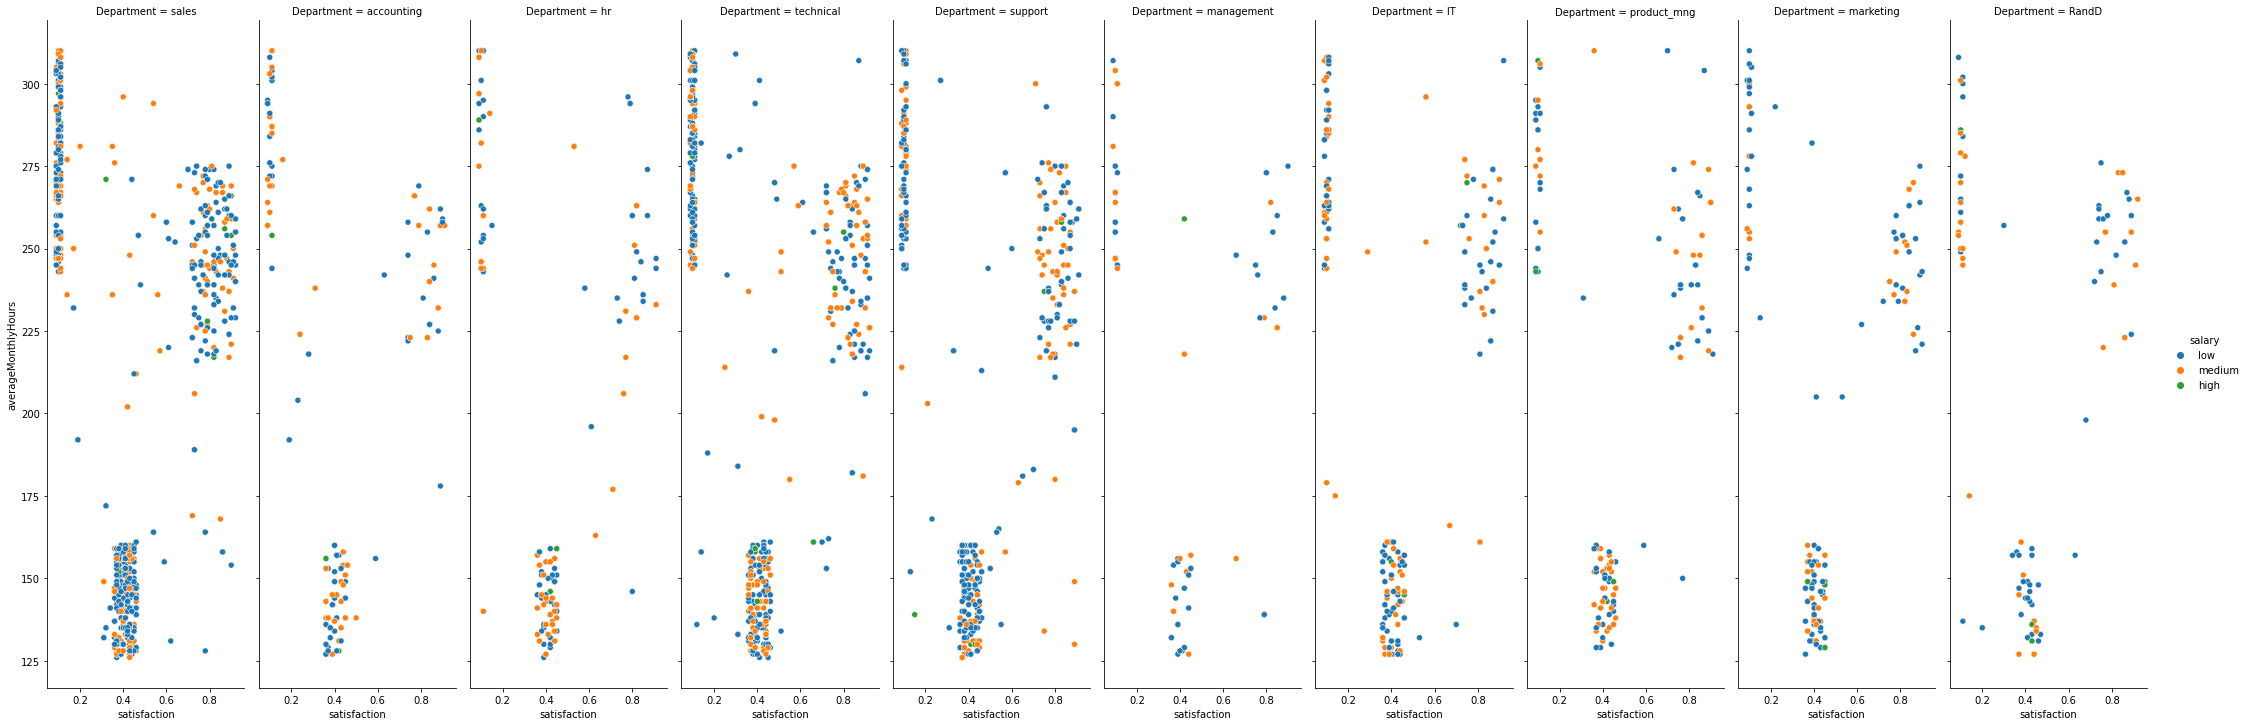

In [95]:
plt.figure(figsize=(9,9))
sns.relplot(x="satisfaction",
                y="averageMonthlyHours",
                col="Department",
                hue="salary",
                kind="scatter",
                height=10,
                aspect=0.3,
                data=df[df['turnover']==1])

In [96]:
df_lr=df.copy()
df_lr=pd.get_dummies(df_lr, columns = ['Department','salary'])
df_lr.head()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,turnover,promotion,Department_IT,Department_RandD,...,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [131]:
df_lr.columns

Index(['satisfaction', 'evaluation', 'projectCount', 'averageMonthlyHours',
       'yearsAtCompany', 'workAccident', 'turnover', 'promotion',
       'Department_IT', 'Department_RandD', 'Department_accounting',
       'Department_hr', 'Department_management', 'Department_marketing',
       'Department_product_mng', 'Department_sales', 'Department_support',
       'Department_technical', 'salary_high', 'salary_low', 'salary_medium'],
      dtype='object')

In [134]:
df_lr.head()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,turnover,promotion,Department_IT,Department_RandD,...,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [135]:
X= df_lr.drop('turnover', axis=1).values
X

array([[0.38, 0.53, 2.  , ..., 0.  , 1.  , 0.  ],
       [0.8 , 0.86, 5.  , ..., 0.  , 0.  , 1.  ],
       [0.11, 0.88, 7.  , ..., 0.  , 0.  , 1.  ],
       ...,
       [0.37, 0.53, 2.  , ..., 0.  , 1.  , 0.  ],
       [0.11, 0.96, 6.  , ..., 0.  , 1.  , 0.  ],
       [0.37, 0.52, 2.  , ..., 0.  , 1.  , 0.  ]])

In [137]:
y=df_lr.turnover
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: turnover, Length: 14999, dtype: int64

In [138]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit(X).transform(X.astype(float))
X

array([[-0.93649469, -1.08727529, -1.46286291, ..., -0.29980859,
         1.02477511, -0.8681323 ],
       [ 0.75281433,  0.84070693,  0.97111292, ..., -0.29980859,
        -0.97582386,  1.15189816],
       [-2.02247906,  0.95755433,  2.59376348, ..., -0.29980859,
        -0.97582386,  1.15189816],
       ...,
       [-0.97671633, -1.08727529, -1.46286291, ..., -0.29980859,
         1.02477511, -0.8681323 ],
       [-2.02247906,  1.42494396,  1.7824382 , ..., -0.29980859,
         1.02477511, -0.8681323 ],
       [-0.97671633, -1.14569899, -1.46286291, ..., -0.29980859,
         1.02477511, -0.8681323 ]])

In [139]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=10)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (11999, 20) (11999,)
Test set: (3000, 20) (3000,)


In [140]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [141]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [142]:
print("Training Accuracy is: ", dt.score(X_train,y_train))
print("Testing Accuracy is: ", dt.score(X_test,y_test))

Training Accuracy is:  0.9700808400700058
Testing Accuracy is:  0.9626666666666667


In [143]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

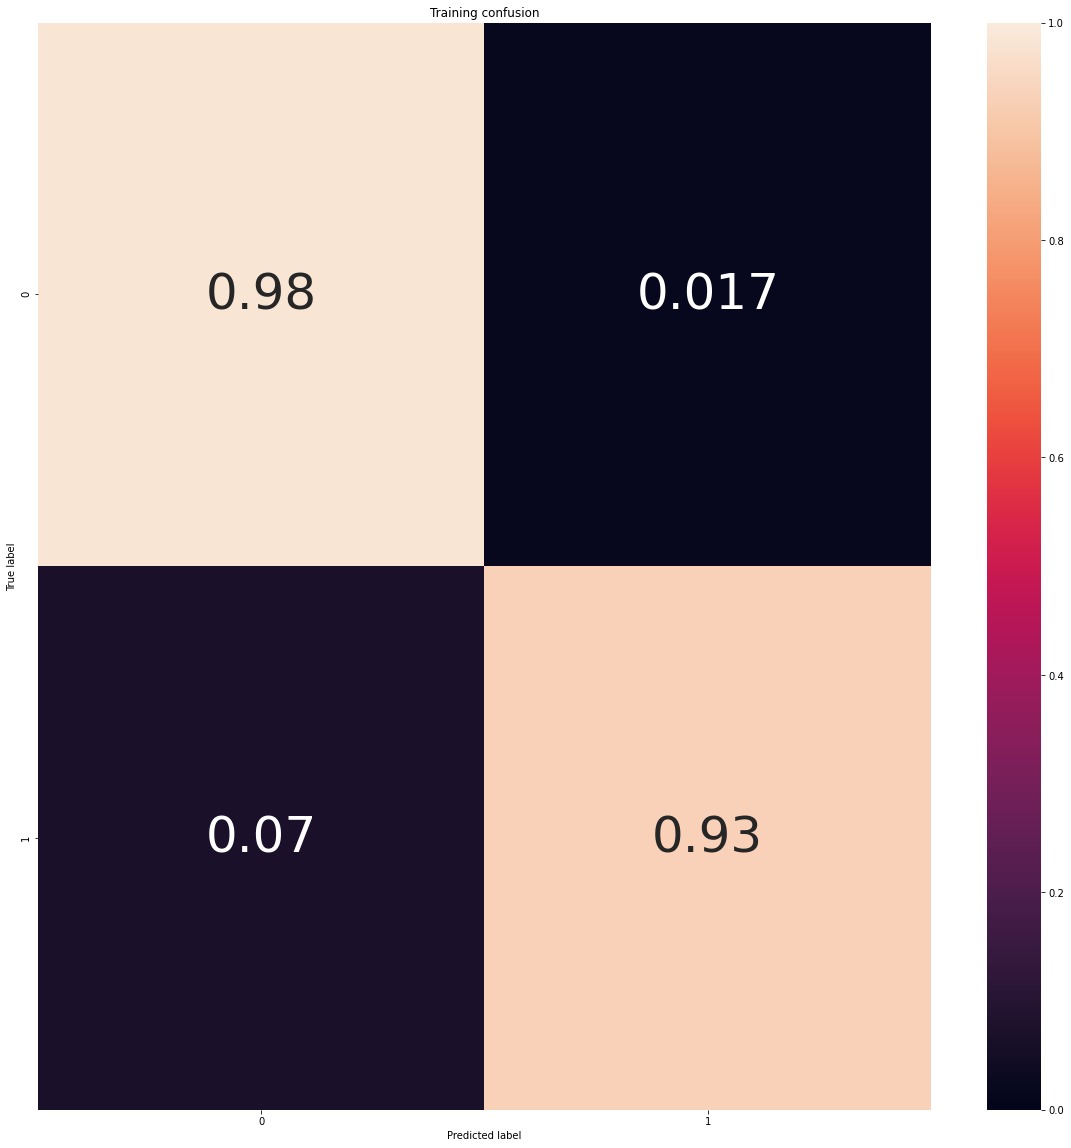

In [144]:
y_pred = dt.predict(X_train)

# Plotting Confusion Matrix
cm = confusion_matrix(y_train, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=dt.classes_, title='Training confusion')

In [145]:
y_pred = dt.predict(X_train)
y_pred
confusion_matrix(y_train, y_pred)

array([[9002,  160],
       [ 199, 2638]])

In [146]:
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print ("The True Positive rate / Recall per class is: ",TPR)

# Precision or positive predictive value
PPV = TP/(TP+FP)
print ("The Precision per class is: ",PPV)

# False positive rate or False alarm rate
FPR = FP/(FP+TN)
print ("The False Alarm rate per class is: ",FPR)

# False negative rate or Miss Rate
FNR = FN/(TP+FN)
print ("The Miss Rate rate per class is: ",FNR)

# Classification error
CER = (FP+FN)/(TP+FP+FN+TN)
print ("The Classification error of each class is", CER)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print ("The Accuracy of each class is", ACC)
print("")

##Total averages :
print ("The average Recall is: ",TPR.sum()/2)
print ("The average Precision is: ",PPV.sum()/2)
print ("The average False Alarm is: ",FPR.sum()/2)
print ("The average Miss Rate rate is: ",FNR.sum()/2)
print ("The average Classification error is", CER.sum()/2)
print ("The average Accuracy is", ACC.sum()/2)

The True Positive rate / Recall per class is:  [0.98253656 0.92985548]
The Precision per class is:  [0.97837192 0.9428163 ]
The False Alarm rate per class is:  [0.07014452 0.01746344]
The Miss Rate rate per class is:  [0.01746344 0.07014452]
The Classification error of each class is [0.02991916 0.02991916]
The Accuracy of each class is [0.97008084 0.97008084]

The average Recall is:  0.956196022605516
The average Precision is:  0.9605941067256651
The average False Alarm is:  0.04380397739448398
The average Miss Rate rate is:  0.04380397739448398
The average Classification error is 0.029919159929994166
The average Accuracy is 0.9700808400700058


## KNN Model

In [158]:
knn_model = KNeighborsClassifier(n_neighbors=3)

In [159]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [160]:
train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse

0.15083731630910374

In [161]:
test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
rmse

0.23874672772626646

In [149]:
from sklearn.model_selection import GridSearchCV

parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsClassifier(), parameters)
gridsearch.fit(X_train, y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(1, 50)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

## This identifies the best knn amount

In [150]:
gridsearch.best_params_

{'n_neighbors': 1}

In [153]:
from sklearn.metrics import mean_squared_error

train_preds_grid = gridsearch.predict(X_train)
train_mse = mean_squared_error(y_train, train_preds_grid)
train_rmse = sqrt(train_mse)
test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
train_rmse

0.0

In [154]:
test_rmse

0.19407902170679517

In [156]:
from sklearn.neighbors import KNeighborsRegressor

parameters = {
     "n_neighbors": range(1, 50),
     "weights": ["uniform", "distance"],}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)
GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50),
                         'weights': ['uniform', 'distance']})
gridsearch.best_params_
{'n_neighbors': 7, 'weights': 'distance'}
test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
test_rmse

0.1831884040356868

In [162]:
knn_model.score(X_test,y_test)

0.943

In [166]:
from sklearn.model_selection import cross_val_score

knn_cv = KNeighborsClassifier(n_neighbors=1)
cv_scores = cross_val_score(knn_cv, X, y, cv=2)
print(cv_scores)
print('cv_scores mean:{}' .format(np.mean(cv_scores)))

[0.9428     0.94132551]
cv_scores mean:0.9420627550340045


In [167]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [168]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [169]:
train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse

0.0

In [170]:
test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
rmse

0.19407902170679517

In [171]:
y_pred = knn_model.predict(X_test)

In [172]:
confusion_matrix(y_test,y_pred)


array([[2201,   65],
       [  48,  686]])

In [173]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2266
           1       0.91      0.93      0.92       734

    accuracy                           0.96      3000
   macro avg       0.95      0.95      0.95      3000
weighted avg       0.96      0.96      0.96      3000



In [175]:
from sklearn.metrics import roc_curve

y_pred_proba = knn_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

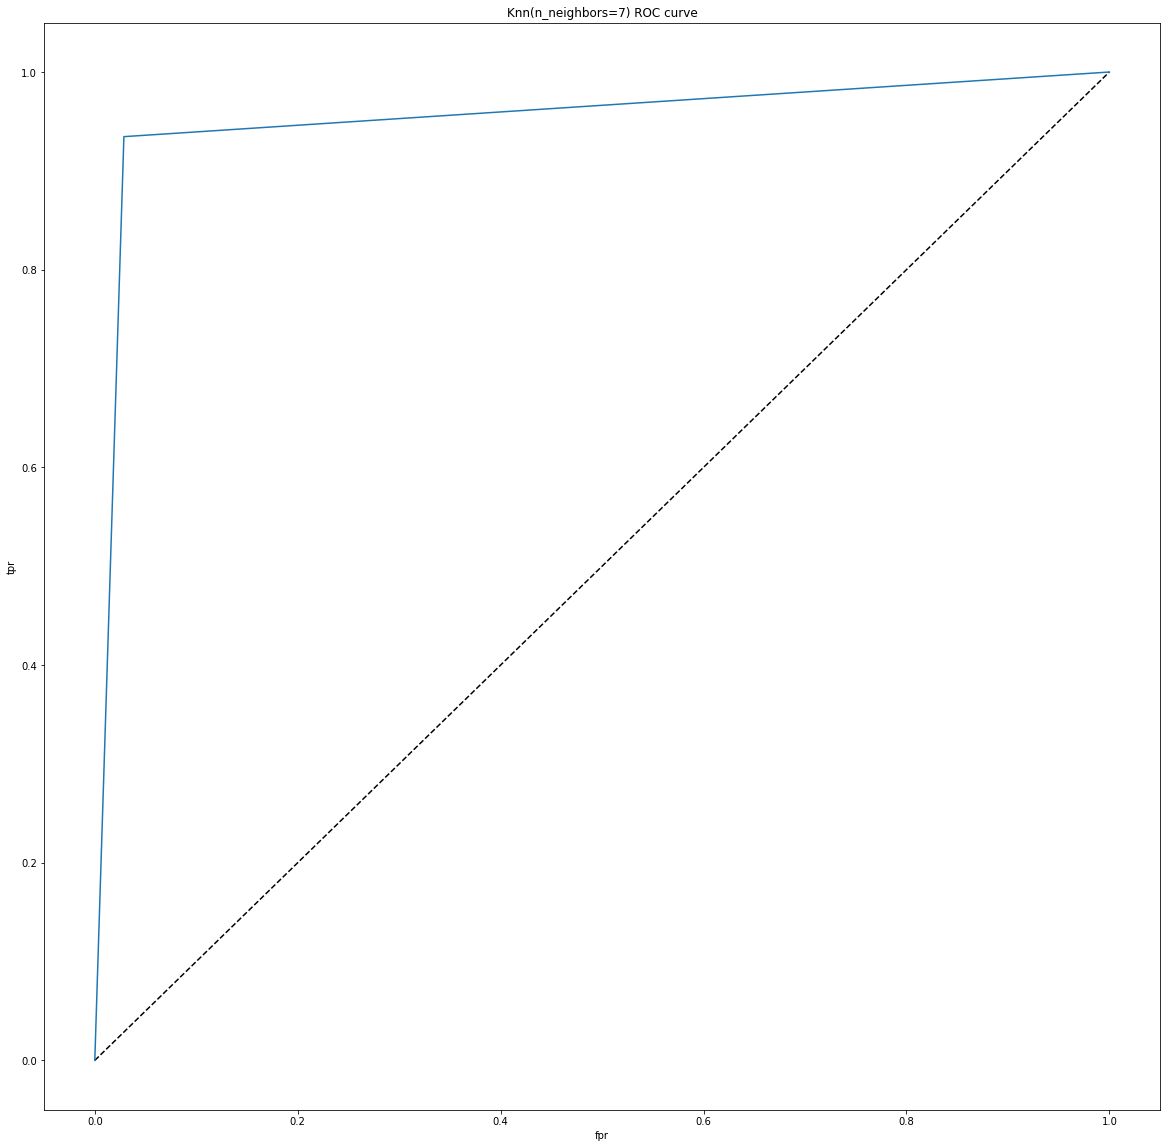

In [176]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()

In [177]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.9529599986532342

## Logistic regression model using the statsmodels 

In [179]:
import statsmodels.api as sm

xtar_cons = sm.add_constant(X)

In [180]:
model = model = sm.OLS(y, xtar_cons)
lr = model.fit()

In [196]:
lr.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               turnover   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     228.6
Date:                Thu, 18 Nov 2021   Prob (F-statistic):               0.00
Time:                        16:25:30   Log-Likelihood:                -6660.5
No. Observations:               14999   AIC:                         1.336e+04
Df Residuals:                   14980   BIC:                         1.350e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2381      0.003     77.244      0.000       0.232       0.244
x1            -0.1601      0.003    -50.260      0.000      -0.166      -0.154
x2             0.0149      0.003      4.349      0.000       0.008       0.022
x3            -0.0420      0.004    -11.696      0.000      -0.049      -0.035
x4             0.0320      0.003      9.187      0.000       0.025       0.039
x5             0.0532      0.003     16.634      0.000       0.047       0.059
x6            -0.0547      0.003    -17.680      0.000      -0.061      -0.049
x7            -0.0162      0.003     -5.153      0.000      -0.022      -0.010
x8            -0.0046      0.003     -1.648      0.099      -0.010       0.001
x9            -0.0149      0.003     -5.121      0.000      -0.021      -0.009
x10            0.0019      0.003      0.648      0.517      -0.004       0.008
x11            0.0093      0.003      3.203      0.001       0.004       0.015
x12           -0.0108      0.003     -3.550      0.000      -0.017      -0.005
x13            0.0014      0.003      0.492      0.622      -0.004       0.007
x14           -0.0037      0.003     -1.283      0.199      -0.009       0.002
x15            0.0015      0.002      0.641      0.522      -0.003       0.006
x16            0.0052      0.003      1.960      0.050    5.09e-08       0.010
x17            0.0061      0.003      2.398      0.016       0.001       0.011
x18           -0.0382      0.003    -13.929      0.000      -0.044      -0.033
x19            0.0301      0.002     16.969      0.000       0.027       0.034
x20           -0.0091      0.002     -5.100      0.000      -0.013      -0.006
==============================================================================
Omnibus:                     1305.185   Durbin-Watson:                   0.395
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1560.771
Skew:                           0.768   Prob(JB):                         0.00
Kurtosis:                       2.629   Cond. No.                     6.40e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.88e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Tried cleaning up the LR model

In [192]:
import statsmodels.formula.api as smf
form_lr = smf.ols(formula='y ~ satisfaction +averageMonthlyHours +yearsAtCompany +yearsAtCompany \
                                    +workAccident +promotion + Department_RandD + Department_hr  \
                                    + Department_management   + salary_low \
                                    + salary_medium ', data=df_lr)


In [193]:
df_lr.columns

Index(['satisfaction', 'evaluation', 'projectCount', 'averageMonthlyHours',
       'yearsAtCompany', 'workAccident', 'turnover', 'promotion',
       'Department_IT', 'Department_RandD', 'Department_accounting',
       'Department_hr', 'Department_management', 'Department_marketing',
       'Department_product_mng', 'Department_sales', 'Department_support',
       'Department_technical', 'salary_high', 'salary_low', 'salary_medium'],
      dtype='object')

In [194]:
mlr = form_lr.fit()

In [195]:
mlr.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     392.9
Date:                Thu, 18 Nov 2021   Prob (F-statistic):               0.00
Time:                        16:24:46   Log-Likelihood:                -6734.8
No. Observations:               14999   AIC:                         1.349e+04
Df Residuals:                   14988   BIC:                         1.358e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.2970      0.020     14.929      0.000       0.258       0.336
satisfaction             -0.6165      0.013    -49.056      0.000      -0.641      -0.592
averageMonthlyHours       0.0004   6.25e-05      6.506      0.000       0.000       0.001
yearsAtCompany            0.0335      0.002     15.442      0.000       0.029       0.038
workAccident             -0.1564      0.009    -17.715      0.000      -0.174      -0.139
promotion                -0.1093      0.022     -5.022      0.000      -0.152      -0.067
Department_RandD         -0.0745      0.014     -5.345      0.000      -0.102      -0.047
Department_hr             0.0419      0.014      2.919      0.004       0.014       0.070
Department_management    -0.0580      0.016     -3.623      0.000      -0.089      -0.027
salary_low                0.1997      0.012     16.702      0.000       0.176       0.223
salary_medium             0.1203      0.012     10.018      0.000       0.097       0.144
==============================================================================
Omnibus:                     1403.961   Durbin-Watson:                   0.382
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1759.282
Skew:                           0.824   Prob(JB):                         0.00
Kurtosis:                       2.683   Cond. No.                     1.58e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Went with another LR approach

In [182]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

## Checking the evaluation agains the three different kinds of models

In [183]:
print("Decision Tree's Accuracy: ", metrics.accuracy_score(y_test, dt.predict(X_test)))
print("KNN's Accuracy: ", metrics.accuracy_score(y_test, knn_model.predict(X_test)))
print("LR's Accuracy: ", metrics.accuracy_score(y_test, LR.predict(X_test)))

Decision Tree's Accuracy:  0.9626666666666667
KNN's Accuracy:  0.9623333333333334
LR's Accuracy:  0.784


In [184]:
print("DT:", classification_report(y_test,  dt.predict(X_test)))
print("KNN:", classification_report(y_test,  knn_model.predict(X_test)))
print("Logr:", classification_report(y_test, LR.predict(X_test)))

DT:               precision    recall  f1-score   support

           0       0.97      0.98      0.98      2266
           1       0.95      0.90      0.92       734

    accuracy                           0.96      3000
   macro avg       0.96      0.94      0.95      3000
weighted avg       0.96      0.96      0.96      3000

KNN:               precision    recall  f1-score   support

           0       0.98      0.97      0.97      2266
           1       0.91      0.93      0.92       734

    accuracy                           0.96      3000
   macro avg       0.95      0.95      0.95      3000
weighted avg       0.96      0.96      0.96      3000

Logr:               precision    recall  f1-score   support

           0       0.81      0.93      0.87      2266
           1       0.61      0.34      0.43       734

    accuracy                           0.78      3000
   macro avg       0.71      0.63      0.65      3000
weighted avg       0.76      0.78      0.76      3000



In [199]:
df.head

<bound method NDFrame.head of        satisfaction  evaluation  projectCount  averageMonthlyHours  \
0              0.38        0.53             2                  157   
1              0.80        0.86             5                  262   
2              0.11        0.88             7                  272   
3              0.72        0.87             5                  223   
4              0.37        0.52             2                  159   
...             ...         ...           ...                  ...   
14994          0.40        0.57             2                  151   
14995          0.37        0.48             2                  160   
14996          0.37        0.53             2                  143   
14997          0.11        0.96             6                  280   
14998          0.37        0.52             2                  158   

       yearsAtCompany  workAccident  turnover  promotion Department  salary  
0                   3             0         1      